# Understanding the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Latest Data

In [3]:
df = pd.read_csv('/kaggle/input/energyinc-customer-data/aily_case_training_data.csv')

In [4]:
df.head(10)

contract_id                  company_category  \
0  d07d473503c6bef7cf1922fab1f88f3e                               NaN   
1  79e38c743a89ad6b950ae6136bbaeb2b  ixuciffexbsibwibpcwdmfwcoixkfscw   
2  6f6a16ed39fd75715b1acc656c749f83  fmwdwsxillemwbbwelxsampiuwwpcdcb   
3  1d8e17bf13218e671e968871e0c6373f  afeccskfmobewicibxofslkxecsuekfi   
4  2c195164c61eeb0edee79688790f3dda                               NaN   
5  628e0960516c0dbdae10ef66596a79c9                               NaN   
6  d70d97dd7fa745a26bcd6ede30faf3b4                               NaN   
7  612cb2b59607977ea1085ed5eb21a1c4                               NaN   
8  f2c2eb4e60bc0c21b2b791912a7f9d93  ddilesxocdoakmfdbmbflfsmeoadpmiw   
9  909b96cfb860dbf9945db4ececf5f81f                               NaN   

   campaing_code_elect                           channel  elect_cons_at_12m  \
0                  NaN  lmkebamcaaclubfxadlmueccxoimlema               1577   
1                  NaN  foosdfpfkusacimwkcsosbicdxkicaua             280731   
2                  NaN  foosdfpfkusacimwkcsosbicdxkicaua              99223   
3                  NaN  foosdfpfkusacimwkcsosbicdxkicaua              10381   
4                  NaN  foosdfpfkusacimwkcsosbicdxkicaua               6107   
5                  NaN                               NaN               9285   
6                  NaN  lmkebamcaaclubfxadlmueccxoimlema               5008   
7                  NaN  lmkebamcaaclubfxadlmueccxoimlema              28778   
8                  NaN  ewpakwlliwisiwduibdlfmalxowmwpci             197306   
9                  NaN  usilxuppasemubllopkaafesmlibmsdf             159508   

   gas_cons_at_12m  elect_cons_last_month contract_activation_date  \
0                0                      0               2010-01-05   
1                0                  16856               2009-11-04   
2           189585                   4783               2013-02-16   
3                0                      0               2012-01-25   
4                0                      0               2011-11-12   
5                0                    508               2010-08-20   
6                0                      0               2010-06-04   
7                0                      0               2010-01-12   
8                0                  14714               2013-04-16   
9                0                   8210               2012-12-25   

  contract_end_date contract_fist_act_date contract_last_mod_date  \
0        2016-12-12                    NaN             2015-11-01   
1        2016-11-04                    NaN             2009-11-04   
2        2016-02-16                    NaN             2013-02-16   
3        2017-01-25                    NaN             2015-12-16   
4        2016-11-12             2011-11-12             2015-09-20   
5        2016-08-20                    NaN             2015-07-11   
6        2016-06-04                    NaN             2010-06-04   
7        2016-02-26                    NaN             2010-01-12   
8        2016-04-16             2012-03-14             2013-12-10   
9        2016-12-25                    NaN             2012-12-25   

  contract_renewal_date  fcst_bill_baseline_elect_next_month  \
0            2015-12-14                                  NaN   
1            2015-11-05                                  NaN   
2            2015-02-18                                  NaN   
3            2016-01-26                                  NaN   
4            2015-11-13                             0.000000   
5            2015-08-21                                  NaN   
6            2015-06-23                                  NaN   
7            2015-02-27                                  NaN   
8            2015-04-17                          1068.067344   
9            2015-12-26                                  NaN   

   fcst_bill_baseline_elect_cal_year  fcst_bill_baseline_elect_12m  \
0                                NaN        

From the beginning of our analysis we can see there are NaN values in our data. We begin by looking at their distribution and ratio, and if we can, we find out why it is there.

In [5]:
df['contract_id'].is_unique 

True

First questions:
* Are all clients buying electricity?
* How many of the clients who churned are old clients?
* How many of the clients who churned are also gas clients?


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   contract_id                          16096 non-null  object 
 1   company_category                     6551 non-null   object 
 2   campaing_code_elect                  0 non-null      float64
 3   channel                              11878 non-null  object 
 4   elect_cons_at_12m                    16096 non-null  int64  
 5   gas_cons_at_12m                      16096 non-null  int64  
 6   elect_cons_last_month                16096 non-null  int64  
 7   contract_activation_date             16096 non-null  object 
 8   contract_end_date                    16094 non-null  object 
 9   contract_fist_act_date               3508 non-null   object 
 10  contract_last_mod_date               15939 non-null  object 
 11  contract_renewal_date       

<Axes: >

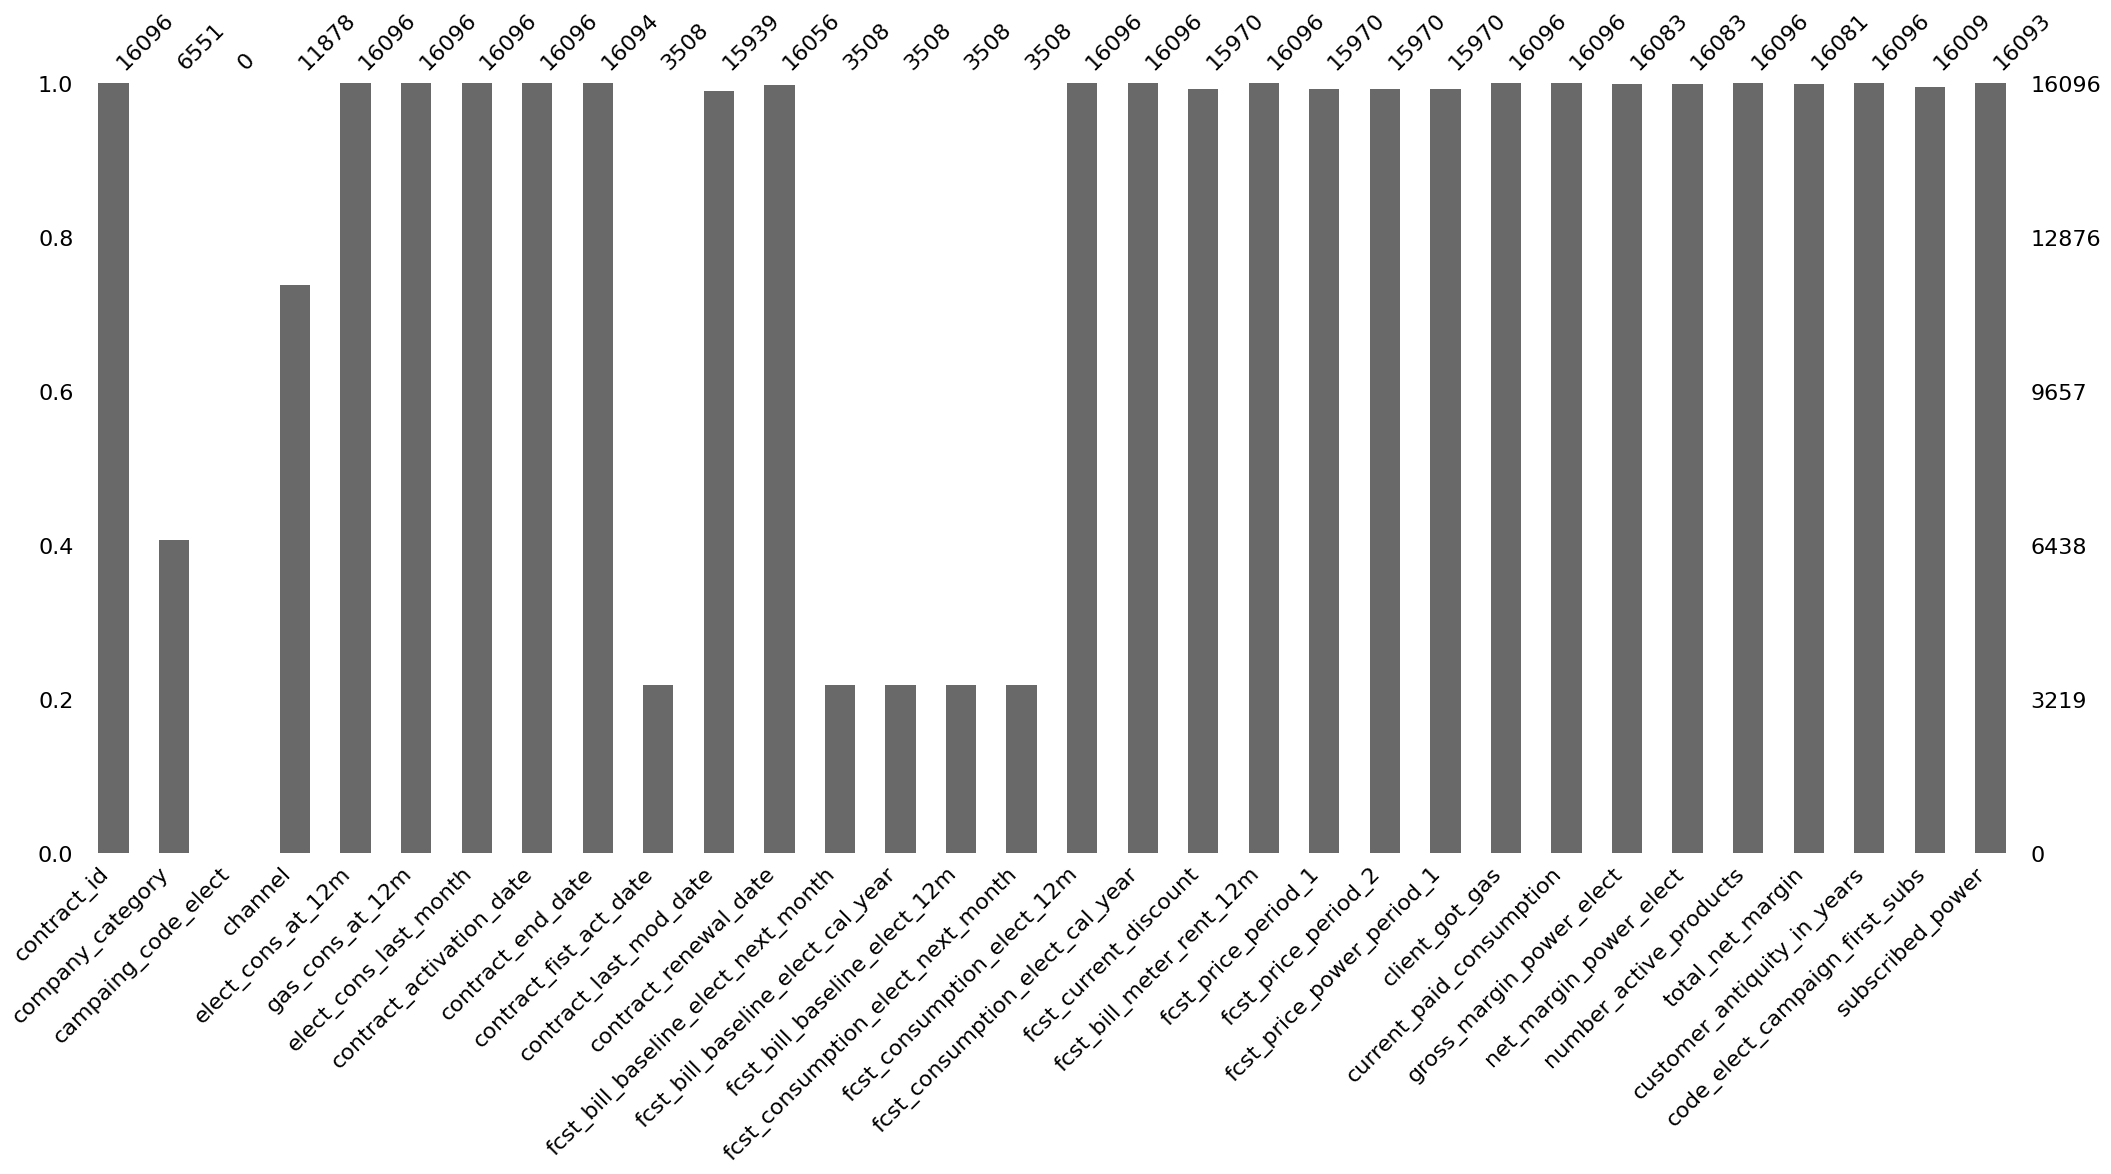

In [7]:
msno.bar(df)

The 'campaing_code_elect' feature contains only null data, therefore it can be dropped.

In [8]:
df.drop(columns=['campaing_code_elect'], inplace=True)

<Axes: >

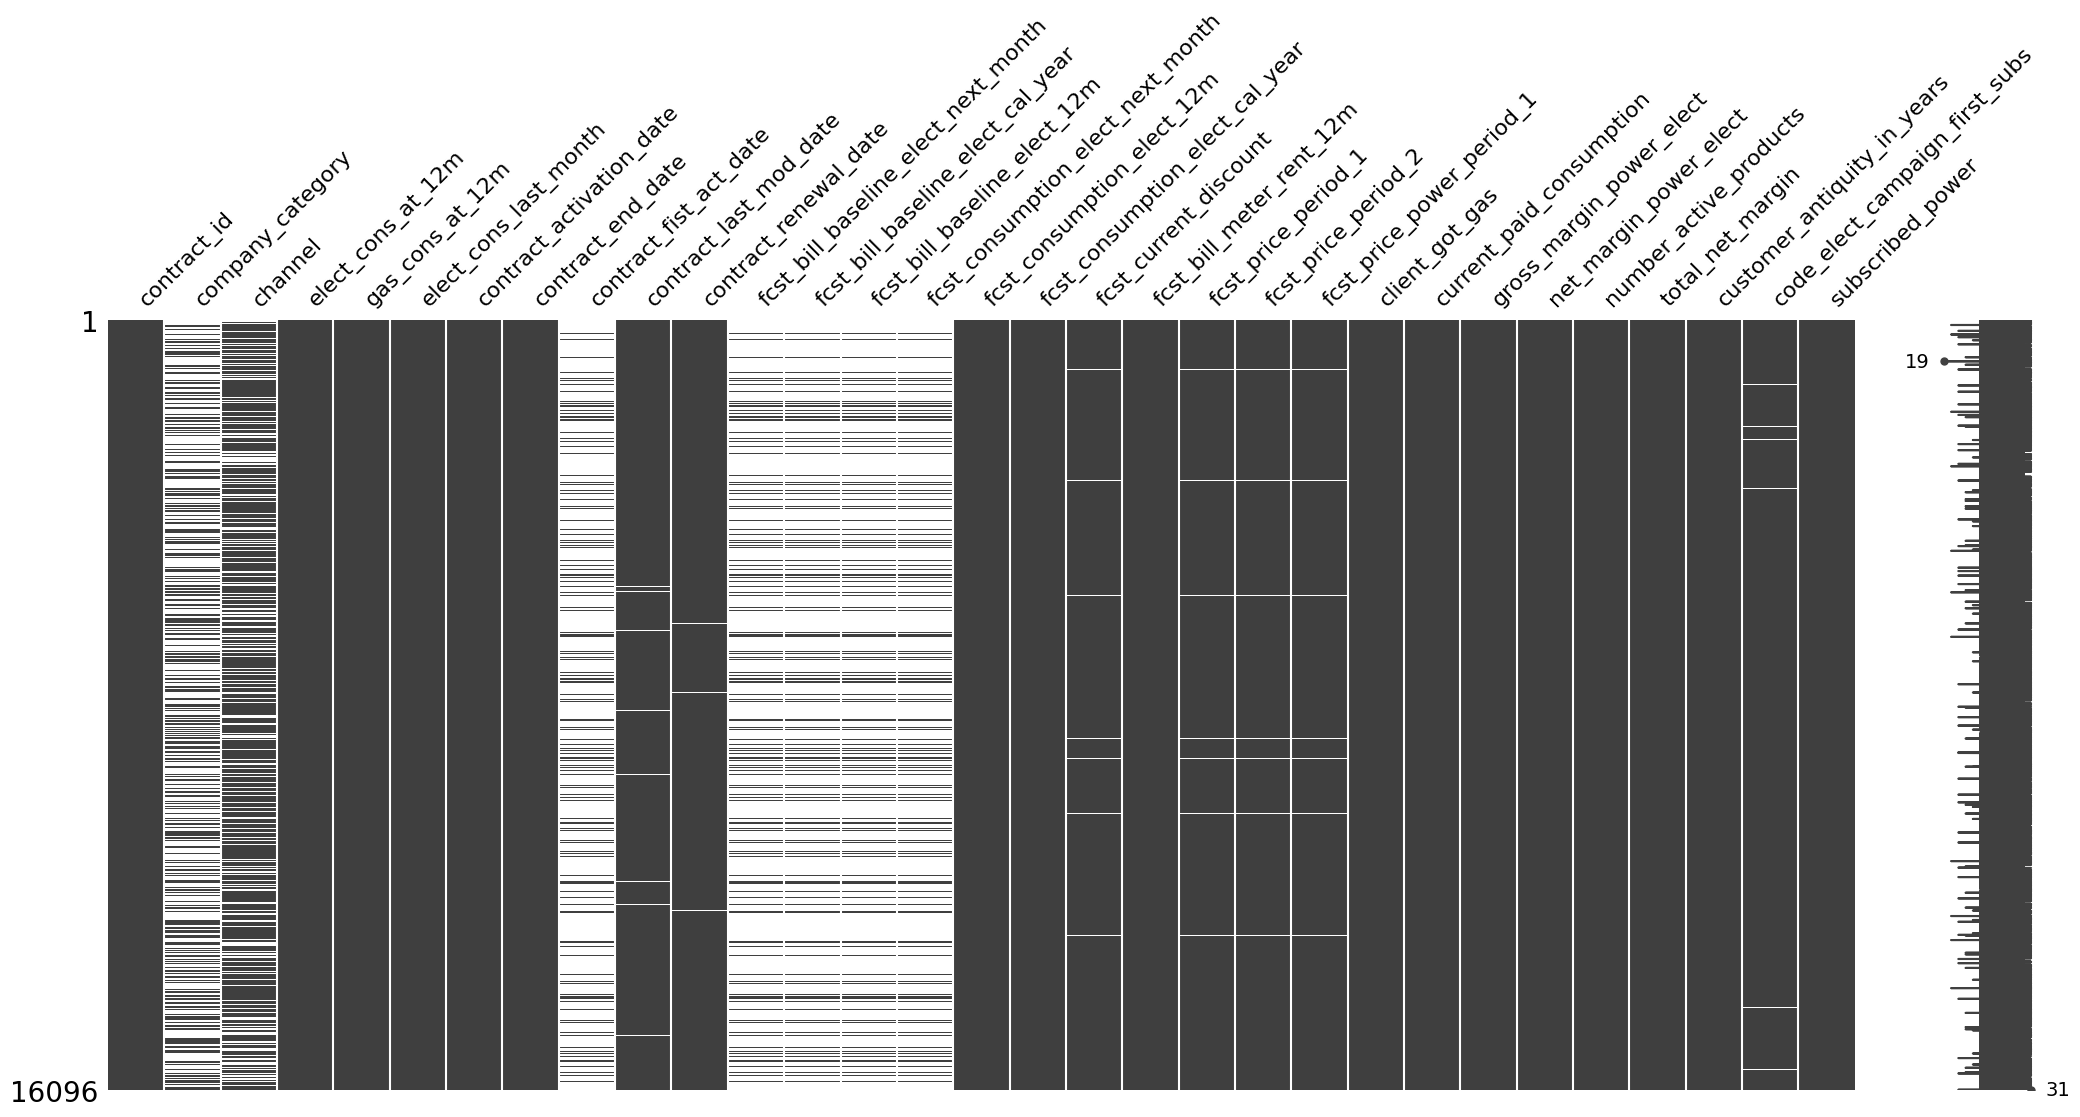

In [9]:
msno.matrix(df)

The data in some columns seem to be quite sparse. Entries range between 19 and 31 non-null features. 
To understand if there is some connection between the present data we can take a look into when the data is not-null using a heatmap and a dendrogram.

<Axes: >

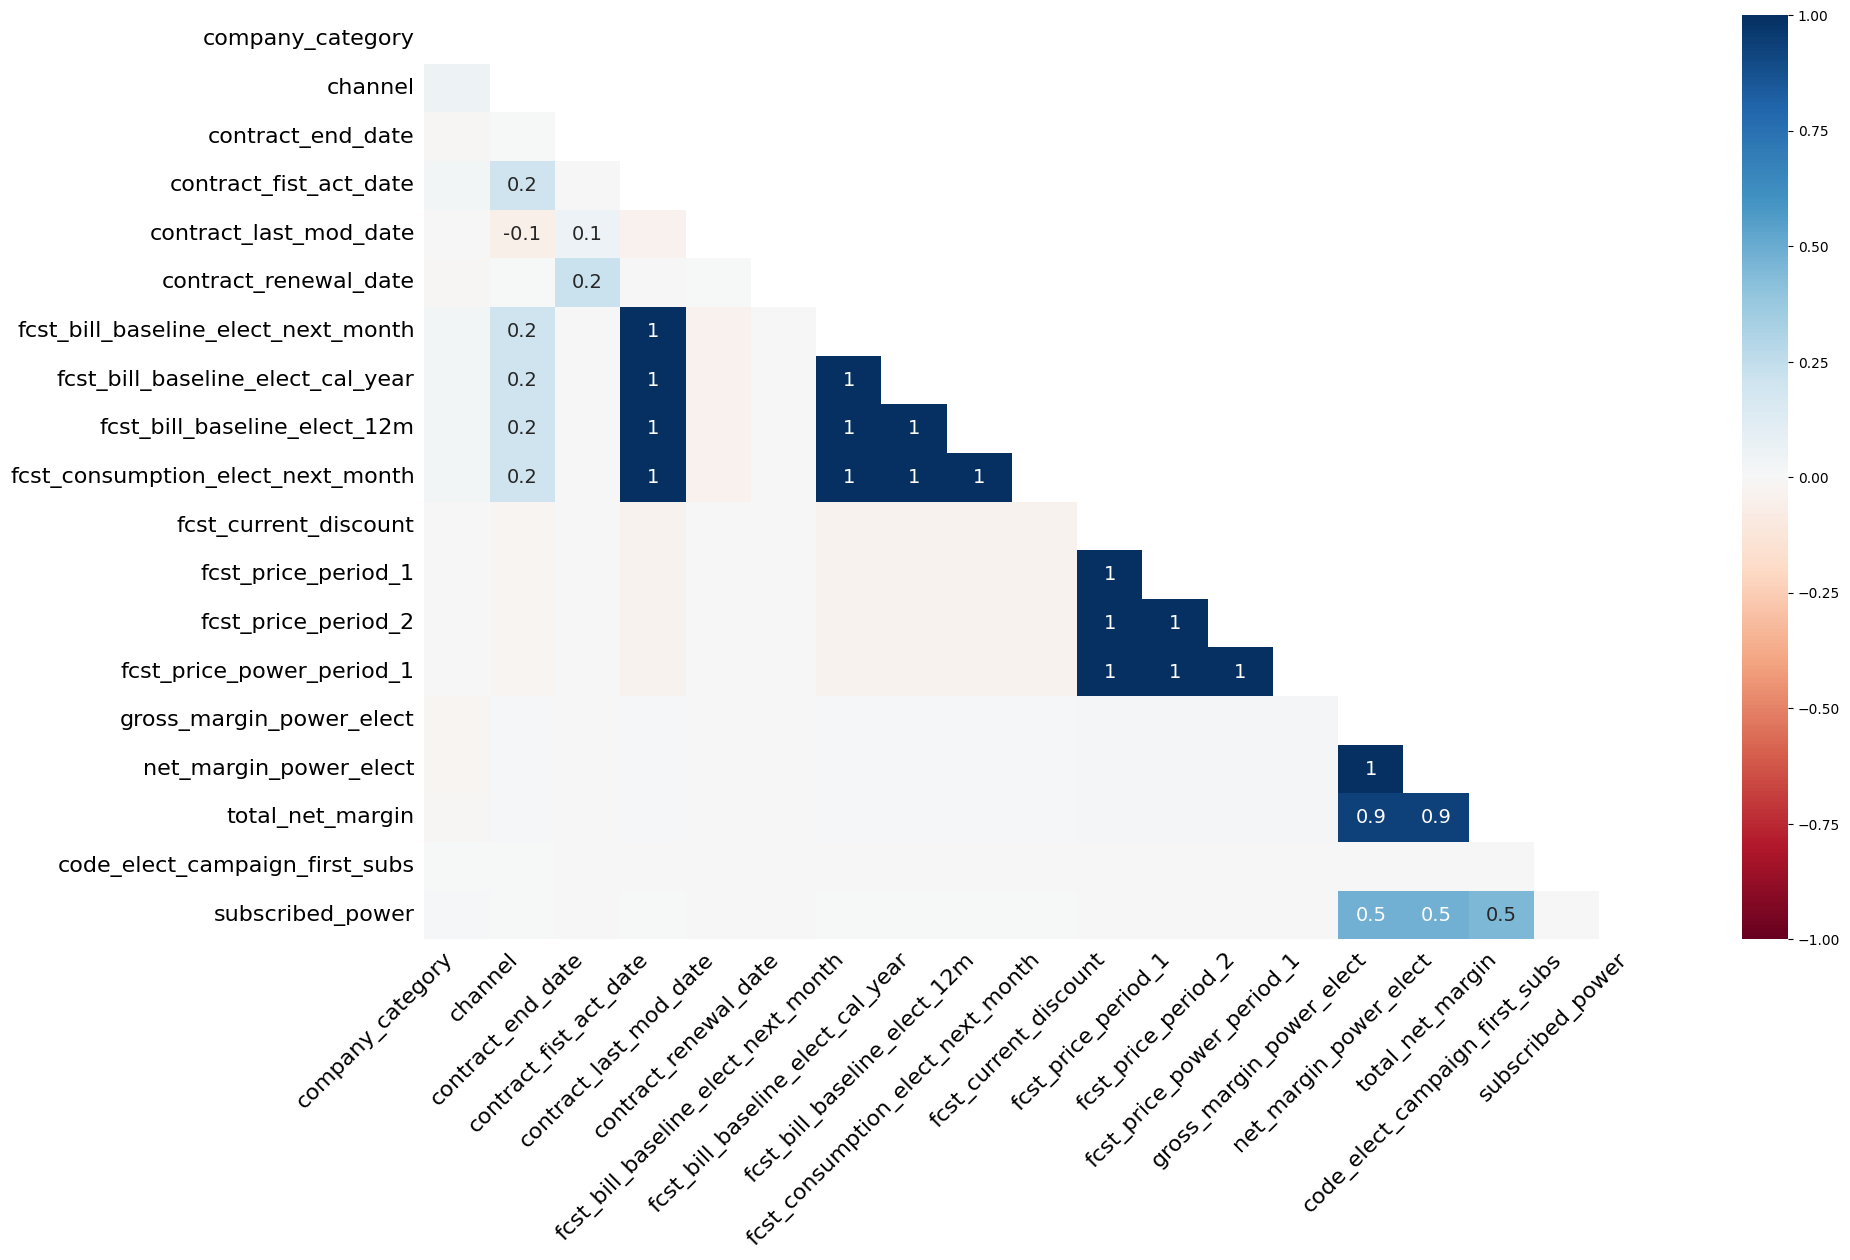

In [10]:
msno.heatmap(df.drop('contract_id', axis='columns'))

<Axes: >

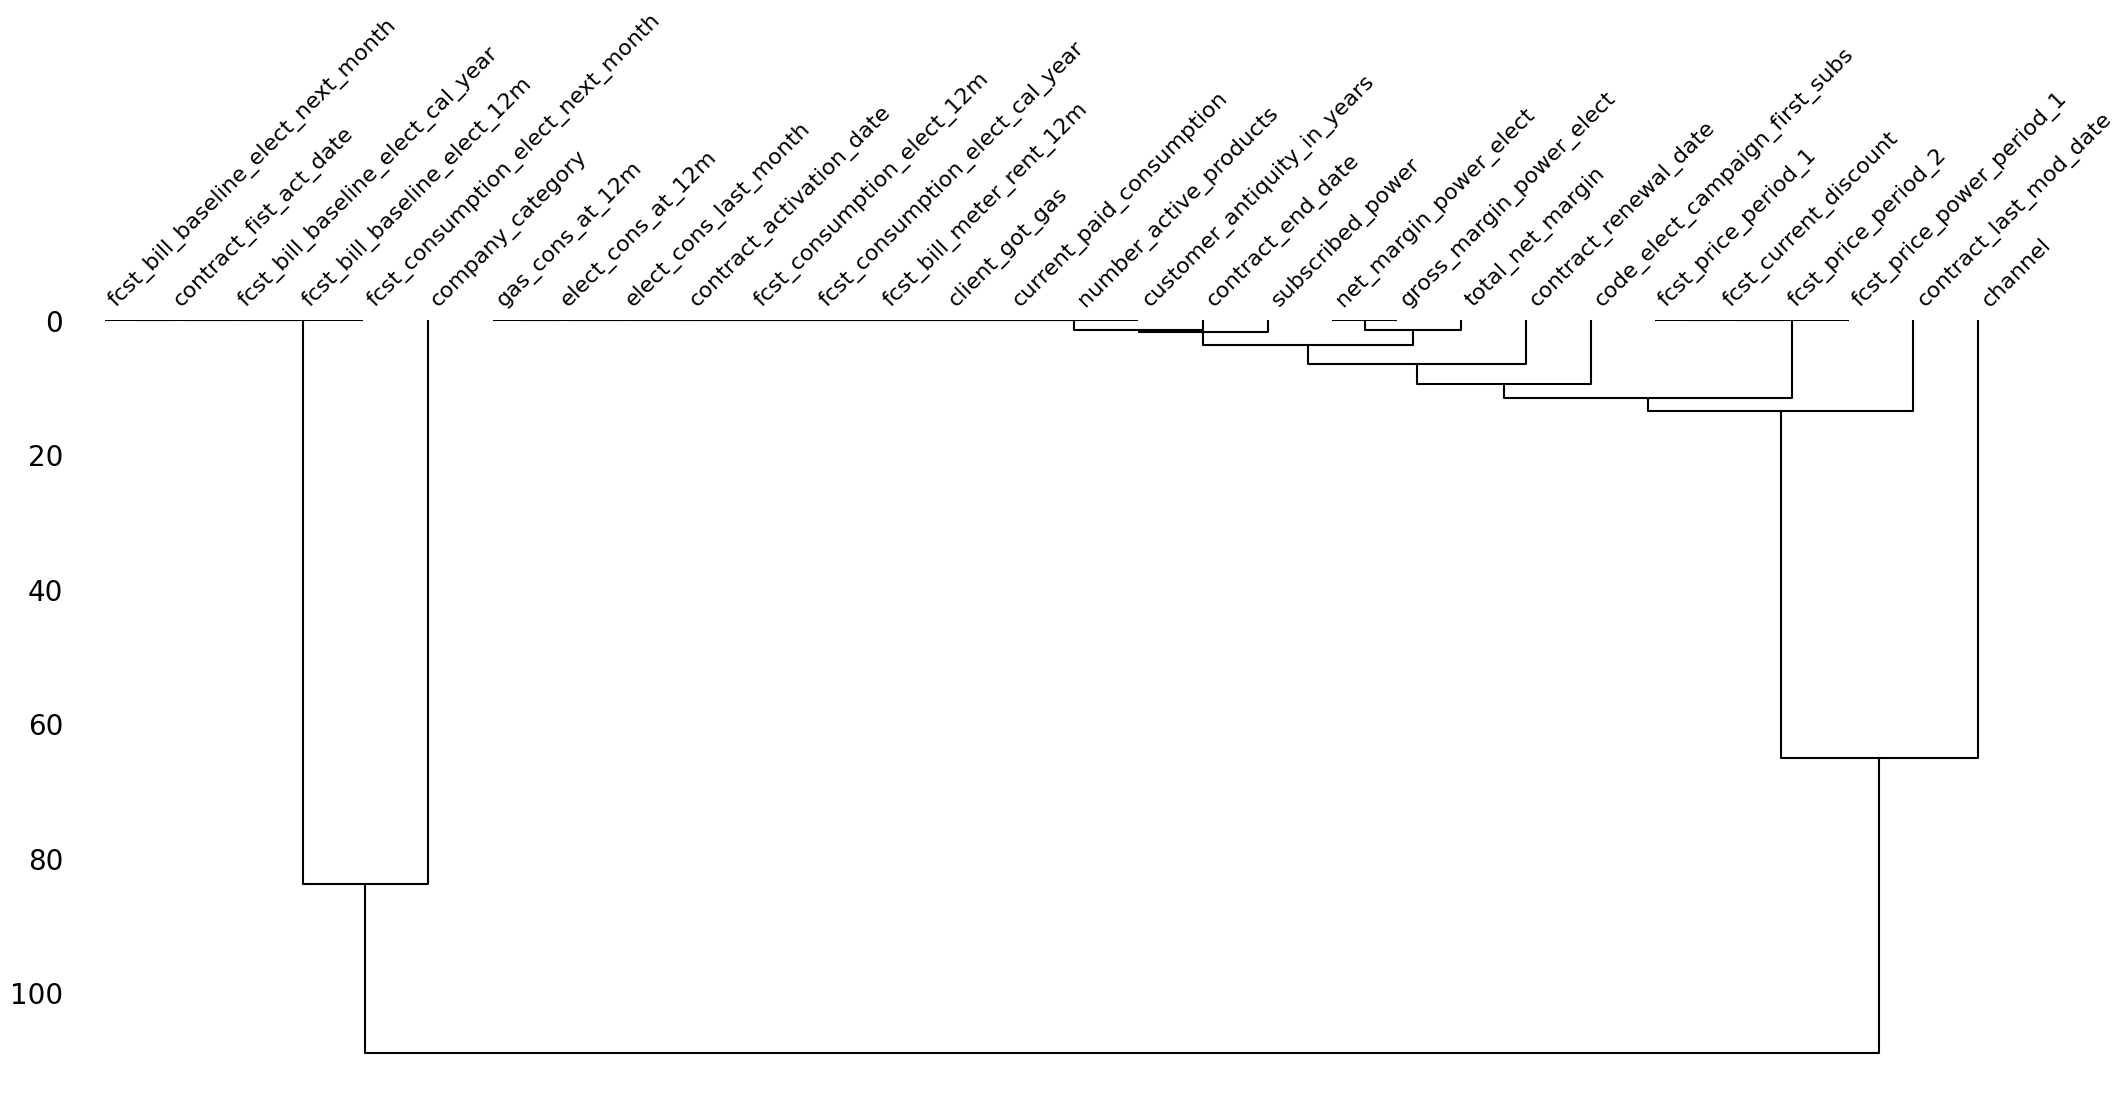

In [11]:
msno.dendrogram(df.drop('contract_id', axis='columns'))

We can conclude that when one of forcasted bill baseline values (month, calendar year, and 12 month) or next month forcasted consumption is present, all the others are present as well. There is a similar connection for the forecasted price for period 1 and 2. Another strong connection is present within subscribtion data, between the gross and net margins on power, and also the total net margin. 

Unfortunetly there is not much we can ddo about the missing forecasted data other than develop our own forecast and use it to impute the missing data.

Looking at the lowest ranking features in terms of non-null data percentage, we have the forecasted baseline costs and next month consumption, which relay strongly on each other, but there is also the 'contract_fist_act_date' feature which is the date of the first contract of the client. Let's look at these dates in comparison to the contract activation date and the last modification date.

In [12]:
date_features = ['contract_id','contract_fist_act_date','contract_activation_date', 'contract_last_mod_date']
df_contract_dates = df[date_features].copy()
df_contract_dates.head()

contract_id contract_fist_act_date  \
0  d07d473503c6bef7cf1922fab1f88f3e                    NaN   
1  79e38c743a89ad6b950ae6136bbaeb2b                    NaN   
2  6f6a16ed39fd75715b1acc656c749f83                    NaN   
3  1d8e17bf13218e671e968871e0c6373f                    NaN   
4  2c195164c61eeb0edee79688790f3dda             2011-11-12   

  contract_activation_date contract_last_mod_date  
0               2010-01-05             2015-11-01  
1               2009-11-04             2009-11-04  
2               2013-02-16             2013-02-16  
3               2012-01-25             2015-12-16  
4               2011-11-12             2015-09-20

In [13]:
df_contract_dates_non_null = df_contract_dates.dropna()
df_contract_dates_non_null.shape[0]

3446

In [14]:
random_rows = df_contract_dates_non_null.sample(n=10, random_state=42)
    
for column in ['contract_fist_act_date','contract_activation_date', 'contract_last_mod_date']:
    random_rows[column] = pd.to_datetime(random_rows[column], errors='coerce')
# Create traces for each contract
traces = []
for index, row in random_rows.iterrows():
    trace = go.Scatter(y=date_features[1:],x=row[date_features[1:]], mode='lines+markers', name=f'Contract ID: {row["contract_id"]}')
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Plot of Randomly Selected Contracts',
    xaxis=dict(title='Date Features', tickangle=45),
    yaxis=dict(title='Date'),
    hovermode='closest',
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show figure
fig.show()

In [15]:
for column in ['contract_fist_act_date','contract_activation_date', 'contract_last_mod_date']:
    df_contract_dates_non_null[column] = pd.to_datetime(df_contract_dates_non_null[column], errors='coerce')

In [16]:
diff_act = df_contract_dates_non_null[df_contract_dates_non_null['contract_fist_act_date'] != df_contract_dates_non_null['contract_activation_date']].copy()
diff_act.shape[0]

313

In [17]:
313/3446 *100

9.082994776552525

Out of all non-null contract data for the selected date features, 9% of the contracts have a different first contract date from the current activation date. This can mean that these contracts are from returning clients, assuming that a current client who wants to change something to their contract, they do so without changing the contract id. We can assume this because we have the 'contract_last_mod_date' feature.

In [18]:

traces = []
for index, row in diff_act.iterrows():
    trace = go.Scatter(y=date_features[1:],x=row[date_features[1:]], mode='lines+markers', name=f'Contract ID: {row["contract_id"]}')
    traces.append(trace)

# Create layout
layout = go.Layout(
    title= 'Plot of Selected Contracts with different first contract',
    xaxis=dict(title='Date Features', tickangle=45),
    yaxis=dict(title='Date'),
    hovermode='closest',
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show figure
fig.show()

We can see that the first activation date is usually before the contract activation date. We can check to make sure that this is the case all the time.

In [19]:
is_fist_act_before_activation = (diff_act['contract_fist_act_date'] < diff_act['contract_activation_date']).all()

if is_fist_act_before_activation:
    print("'contract_fist_act_date' is always before 'contract_activation_date' in different_dates_df.")
else:
    print("'contract_fist_act_date' is not always before 'contract_activation_date' in different_dates_df.")

'contract_fist_act_date' is always before 'contract_activation_date' in different_dates_df.


In [20]:
3508/16096 *100

21.794234592445328

Now we know that if there is a returning customer, we have a 'contract_fist_act_date' different from the 'contract_activation_date', and we can assume this is always the case. 

Because this feature is non-null only 22% of the time, we cannot keep the feature as it is. However, we can create a new feature for returning customer which we can populate using the date in this field (if any) and compare it to the current activation date.

Next in line when it comes to null-data majority, are the categorical features: channel and company_category.

In [21]:
df['channel'].value_counts().shape[0]

7

There are 7 sales channel options, 8 if we want to add another one for the null values. 

In [22]:
df['company_category'].value_counts().shape[0]

419

There are 419 different company categories, 420 if we decide to add another one for the null values. This is a high cardinality feature we need to decide if it is important enough for the target for it to stay for modelling. 

## Target Data

In [23]:
target = pd.read_csv('/kaggle/input/energyinc-customer-data/aily_case_training_output.csv')

In [24]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   contract_id               16096 non-null  object
 1   has_churned_over_next_3m  16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [25]:
target['contract_id'].is_unique

True

In [26]:
target['target_label'] = target['has_churned_over_next_3m'].map({0: 'Not Churned', 1: 'Churned'})

fig = px.pie(target, names='target_label', title='Distribution of Target', labels={'target_label': 'Churn Status'})
fig.update_traces(textinfo='value+percent')
fig.show()

In [27]:
target['has_churned_over_next_3m'].value_counts()

has_churned_over_next_3m
0    14501
1     1595
Name: count, dtype: int64

Let's check if all the target contracts are also in the rest of the data.

In [28]:
unique_contract_ids_df = set(df['contract_id'])
unique_contract_ids_target = set(target['contract_id'])

if unique_contract_ids_df.issubset(unique_contract_ids_target):
    print("All contract_ids from df are also in target.")
else:
    print("Not all contract_ids from df are in target.")

All contract_ids from df are also in target.


If we were to consider only the entries with non-null values, let's look at the target distribution in that case.

In [29]:
merged_df = pd.merge(df, target, on='contract_id', how='inner')
# Filter out entries with non-null values
filtered_df = merged_df.dropna()

filtered_df['target_label'] = filtered_df['has_churned_over_next_3m'].map({0: 'Not Churned', 1: 'Churned'})

# Plot the distribution of the target using a pie plot
fig = px.pie(filtered_df, names='target_label', title='Distribution of Target', labels={'target_label': 'Churn Status'})
fig.update_traces(textinfo='value+percent')
fig.show()

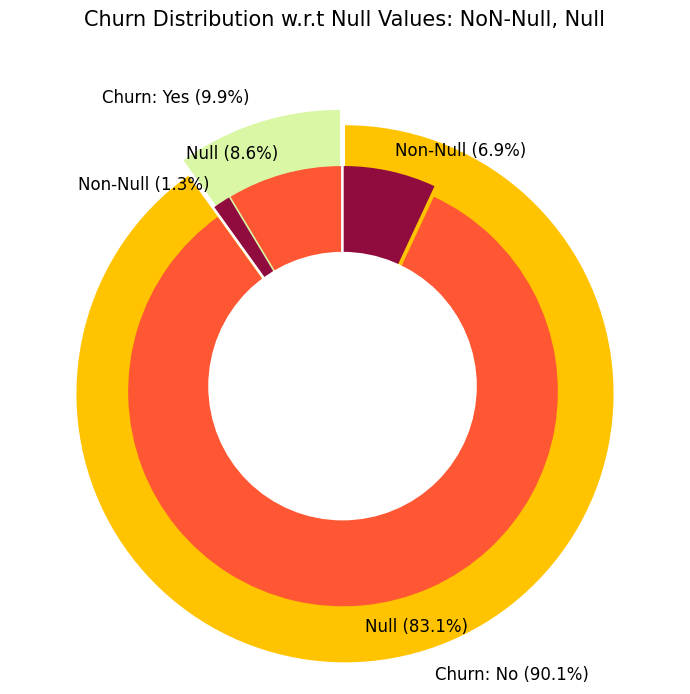

In [30]:
plt.figure(figsize=(7, 7))

labels = ["Churn: Yes", "Churn: No"]
values = [1595, 14501]
labels2 = ["Null", "Non-Null", "Null", "Non-Null"]
sizes2 = [1385, 210, 13383, 1118]
colors = ['#DAF7A6', '#FFC300']
colors2 = ['#FF5733', '#900C3F', '#FF5733', '#900C3F']
explode = (0.3, 0.3)
explode2 = (0.2, 0.2, 0.2, 0.2)
textprops = {"fontsize": 12}

# Plot the churn distribution pie chart
plt.pie(values, labels=['{} ({:.1f}%)'.format(label, value / sum(values) * 100) for label, value in zip(labels, values)], autopct='', pctdistance=0.75, labeldistance=1.1, colors=colors, startangle=90, frame=True, explode=explode, radius=10, textprops=textprops, counterclock=True)

# Plot the gender distribution pie chart
plt.pie(sizes2, labels=['{} ({:.1f}%)'.format(label, value / sum(sizes2) * 100) for label, value in zip(labels2, sizes2)], colors=colors2, startangle=90, explode=explode2, radius=8, textprops=textprops, counterclock=True, labeldistance=1.1)  

# Draw the center circle
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set the title
plt.title('Churn Distribution w.r.t Null Values: NoN-Null, Null', fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()


### General Observations:
* every customer is bound by a unique contract
* there are 2 types of energy (products) offered: gas and electricity
* we have target data for all contracts from the latest data

### Data Overview:
* **contract data**: id, activation date, end date, renewal date, date of first contract, date of last modification 
* **customer data**: company category, campaign subscribed to, sales channel, gas client, antiquity of the client, first campaign subscribed to, nr of active products, has churned in 3 months
* **costs**:
    * **forecasted electricity**: next month bill, calendar year bill,12 months bill (all baseline)
    * **other forecasted costs**: meter rental 12 months,energy price (1st period), energy price (2nd period), power price (1st period), current discount 
* **consumption**:             
    * **forecasted electricity**: next month, calendar year,12 months 
    * **electricity**: past 12 months, last month
    * **gas**: past 12 months
* **subscription**: 
    * **consumption**: paid
    * **margins**: gross margin power, net margin power, total net margin 
    * **other**: subscribed power

## Historical Data

In [31]:
hist = pd.read_csv('/kaggle/input/energyinc-customer-data/aily_case_training_hist_data.csv')

In [32]:
hist.head(5)

contract_id reference_date  price_energy_1st_period  \
0  cd7ad4a23c39fd588bf326333786300c     2015-02-01                 0.136157   
1  73c63df734c0948948b61dcab3153dce     2015-06-01                 0.134560   
2  75d7981514dd168b8ca9954c62342426     2015-03-01                 0.153324   
3  3d4e8ae29da9e25cf77dd6966ff8c02e     2015-09-01                 0.133067   
4  5c8b795e6ff043528535ef4060416db3     2015-04-01                 0.137101   

   price_energy_2nd_period  price_energy_3rd_period  price_power_1st_period  \
0                 0.000000                      0.0               39.926856   
1                 0.000000                      0.0               39.926855   
2                 0.067422                      0.0               39.926856   
3                 0.000000                      0.0               39.926855   
4                 0.000000                      0.0               39.926855   

   price_power_2nd_period  price_power_3rd_period  
0                     0.0                     0.0  
1                     0.0                     0.0  
2                     0.0                     0.0  
3                     0.0                     0.0  
4                     0.0                     0.0

Let's check if all the contracts from the historical data are also present in the target data.

In [33]:
unique_contract_ids_df = set(hist['contract_id'])
unique_contract_ids_target = set(target['contract_id'])

# Check if all contract_ids from df are also in target
if unique_contract_ids_df.issubset(unique_contract_ids_target):
    print("All contract_ids from df are also in target.")
else:
    print("Not all contract_ids from hist are in target.")

All contract_ids from df are also in target.


After doing some research on what the pricing perios might be, it turns out that during the day the price of energy and power can vary due to the rates of demand. We can assume the 3 periods are split as follows:
1. Peak period (3 PM - 8 PM): High demand, higher prices, typically late afternoon to early evening.
2. Off-peak period (10 PM - 6 AM): Low demand, lower prices, usually late night to early morning.
3. Shoulder period (8 AM - 3 PM, 8 PM - 10 PM): Moderate demand, intermediate prices, between peak and off-peak times.

Let's take a look at how the price varies so we can understand which number represents which period in our data.

In [34]:
hist['reference_date'].value_counts()

reference_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

There are monthly entries for each contract. It can be assume that almost all contracts should have 12 entries.

In [35]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   contract_id              193002 non-null  object 
 1   reference_date           193002 non-null  object 
 2   price_energy_1st_period  191643 non-null  float64
 3   price_energy_2nd_period  191643 non-null  float64
 4   price_energy_3rd_period  191643 non-null  float64
 5   price_power_1st_period   191643 non-null  float64
 6   price_power_2nd_period   191643 non-null  float64
 7   price_power_3rd_period   191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [36]:
 print(f'Percentage of data with full feature coverage: {round(191643/193002 *100,1)}%') 

Percentage of data with full feature coverage: 99.3%


In [37]:
hist['contract_id'].nunique()

16096

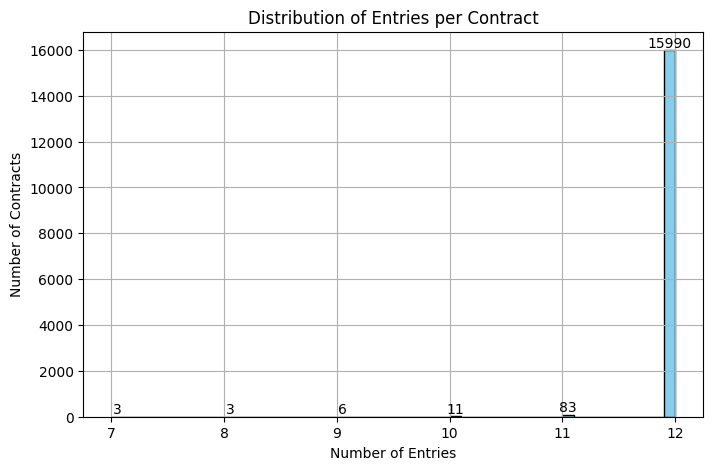

In [38]:
contract_counts = hist['contract_id'].value_counts()

plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(contract_counts, bins=50, color='skyblue', edgecolor='black')

plt.title('Distribution of Entries per Contract')
plt.xlabel('Number of Entries')
plt.ylabel('Number of Contracts')
plt.grid(True)

# Add text annotations on top of each bar
for count, bin_edge, patch in zip(n, bins, patches):
    if count > 0:
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

plt.show()

 As we assumed, most of the contracts have 12 entries (one from each month as we can see above), and some have missing entries. Before looking into those missing entries, lets look at some price evolutions for contracts with complete entries. For this we will select a contract with 12 entries at random and look at the price evolution for each period.

In [39]:
contract_id_with_12_entries = hist['contract_id'].value_counts()[hist['contract_id'].value_counts() == 12].index.tolist()
random_contract_id = np.random.choice(contract_id_with_12_entries)

contract_df = hist[hist['contract_id'] == random_contract_id].reset_index()

display(contract_df)

index                       contract_id reference_date  \
0    17011  a279bbf0890071ba6d7681a6a0510a98     2015-11-01   
1    32811  a279bbf0890071ba6d7681a6a0510a98     2015-02-01   
2    43550  a279bbf0890071ba6d7681a6a0510a98     2015-05-01   
3    57457  a279bbf0890071ba6d7681a6a0510a98     2015-10-01   
4    65334  a279bbf0890071ba6d7681a6a0510a98     2015-04-01   
5    86122  a279bbf0890071ba6d7681a6a0510a98     2015-09-01   
6    90065  a279bbf0890071ba6d7681a6a0510a98     2015-06-01   
7   111797  a279bbf0890071ba6d7681a6a0510a98     2015-01-01   
8   122686  a279bbf0890071ba6d7681a6a0510a98     2015-07-01   
9   163574  a279bbf0890071ba6d7681a6a0510a98     2015-08-01   
10  180682  a279bbf0890071ba6d7681a6a0510a98     2015-03-01   
11  186451  a279bbf0890071ba6d7681a6a0510a98     2015-12-01   

    price_energy_1st_period  price_energy_2nd_period  price_energy_3rd_period  \
0                  0.129570                      0.0                      0.0   
1                  0.132678                      0.0                      0.0   
2                  0.136350                      0.0                      0.0   
3                  0.129570                      0.0                      0.0   
4                  0.136350                      0.0                      0.0   
5                  0.129168                      0.0                      0.0   
6                  0.133202                      0.0                      0.0   
7                  0.132678                      0.0                      0.0   
8                  0.133202                      0.0                      0.0   
9                  0.129168                      0.0                      0.0   
10                 0.132678                      0.0                      0.0   
11                 0.129570                      0.0                      0.0   

    price_power_1st_period  price_power_2nd_period  price_power_3rd_period  
0                40.087205                     0.0                     0.0  
1                40.087205                     0.0                     0.0  
2                40.087205                     0.0                     0.0  
3                40.087205                     0.0                     0.0  
4                40.087205                     0.0                     0.0  
5                40.087205                     0.0                     0.0  
6                40.087205                     0.0                     0.0  
7                40.087205                     0.0                     0.0  
8                40.087205                     0.0                     0.0  
9                40.087205                     0.0                     0.0  
10               40.087205                     0.0                     0.0  
11               40.087205                     0.0                     0.0

In [40]:
period_columns_energy = ['price_energy_1st_period', 'price_energy_2nd_period', 'price_energy_3rd_period']
period_columns_power = ['price_power_1st_period', 'price_power_2nd_period', 'price_power_3rd_period']

contract_df_melted_energy = contract_df.melt(id_vars=['reference_date'], value_vars=period_columns_energy, var_name='period', value_name='price')
contract_df_melted_power = contract_df.melt(id_vars=['reference_date'], value_vars=period_columns_power, var_name='period', value_name='power')

fig1 = px.line(contract_df_melted_energy, x='period', y='price', color='reference_date', markers=True, 
               title=f'Energy Price Evolution for contract id {random_contract_id}')
fig1.update_layout(xaxis_title='Periods', yaxis_title='Price')

# Plot for power evolution
fig2 = px.line(contract_df_melted_power, x='period', y='power', color='reference_date', markers=True, 
               title=f'Power Price Evolution for contract id {random_contract_id}')
fig2.update_layout(xaxis_title='Periods', yaxis_title='Power')

# Display the plots
fig1.show()
fig2.show()

After looking at the above plots we can can assume that the first period is the peak period, the second period is the off-peak period, and the third priod is the shoulder period. 

Another thing we can observe in the plots is that the power price over the year is almost constant for each pricing period. The energy price is more varied, but the variation doesn't look too large. We can further investigate this for the entire historical data. This will help us have a general ideea of how these prices evolve with time and we can use this knowleddge if we decide to impute the missing values for this data.

In [41]:
test_hist = hist.drop(columns=['reference_date']).copy()
grouped = test_hist.groupby('contract_id').agg(['mean', 'std',  np.var])
grouped.head()

price_energy_1st_period                      \
                                                    mean       std       var   
contract_id                                                                    
0002203ffbb812588b632b9e628cc38d                0.112421  0.003595  0.000013   
0004351ebdd665e6ee664792efc4fd13                0.132392  0.001986  0.000004   
0010bcc39e42b3c2131ed2ce55246e3c                0.164156  0.023515  0.000553   
0010ee3855fdea87602a5b7aba8e42de                0.107374  0.004565  0.000021   
00114d74e963e47177db89bc70108537                0.133747  0.001991  0.000004   

                                 price_energy_2nd_period                      \
                                                    mean       std       var   
contract_id                                                                    
0002203ffbb812588b632b9e628cc38d                0.082338  0.001578  0.000002   
0004351ebdd665e6ee664792efc4fd13                0.000000  0.000000  0.000000   
0010bcc39e42b3c2131ed2ce55246e3c                0.000000  0.000000  0.000000   
0010ee3855fdea87602a5b7aba8e42de                0.077974  0.002047  0.000004   
00114d74e963e47177db89bc70108537                0.000000  0.000000  0.000000   

                                 price_energy_3rd_period            \
                                                    mean       std   
contract_id                                                          
0002203ffbb812588b632b9e628cc38d                0.093230  0.001743   
0004351ebdd665e6ee664792efc4fd13                0.000000  0.000000   
0010bcc39e42b3c2131ed2ce55246e3c                0.000000  0.000000   
0010ee3855fdea87602a5b7aba8e42de                0.087969  0.000514   
00114d74e963e47177db89bc70108537                0.000000  0.000000   

                                               price_power_1st_period  \
                                           var                   mean   
contract_id                                                             
0002203ffbb812588b632b9e628cc38d  3.039315e-06              36.711201   
0004351ebdd665e6ee664792efc4fd13  0.000000e+00              40.033756   
0010bcc39e42b3c2131ed2ce55246e3c  0.000000e+00              40.876417   
0010ee3855fdea87602a5b7aba8e42de  2.643111e-07              36.662221   
00114d74e963e47177db89bc70108537  0.000000e+00              39.926856   

                                                              \
                                           std           var   
contract_id                                                    
0002203ffbb812588b632b9e628cc38d  5.719742e-02  3.271544e-03   
0004351ebdd665e6ee664792efc4fd13  7.895028e-02  6.233147e-03   
0010bcc39e42b3c2131ed2ce55246e3c  6.966650e-01  4.853422e-01   
0010ee3855fdea87602a5b7aba8e42de  7.673810e-02  5.888736e-03   
00114d74e963e47177db89bc70108537  5.329114e-07  2.839945e-13   

                                 price_power_2nd_period                      \
                                                   mean       std       var   
contract_id                                                                   
0002203ffbb812588b632b9e628cc38d              18.453697  0.028752  0.000827   
0004351ebdd665e6ee664792efc4fd13               0.000000  0.000000  0.000000   
0010bcc39e42b3c2131ed2ce55246e3c               0.000000  0.000000  0.000000   
0010ee3855fdea87602a5b7aba8e42de              18.429075  0.038574  0.001488   
00114d74e963e47177db89bc70108537               0.000000  0.000000  0.000000   

                                 price_power_3rd_period                      
                                                   mean       std       var  
contract_id                                                                  
0002203ffbb812588b632b9e628cc38d              12.341252  0.019228  0.000370  
0004351ebdd665e6ee664792efc4fd13               0.000000  0.000000  0.000000  
0010bcc39e42b3c2131ed2ce55246e3c               0.000000  0.000000  0.

In [42]:
grouped.describe()

price_energy_1st_period                              \
                         mean           std           var   
count            16094.000000  16094.000000  16094.000000   
mean                 0.127489      0.003679      0.000035   
std                  0.021968      0.004661      0.000188   
min                  0.000000      0.000000      0.000000   
25%                  0.112091      0.001968      0.000004   
50%                  0.133137      0.002810      0.000008   
75%                  0.135909      0.003814      0.000015   
max                  0.252040      0.062367      0.003890   

      price_energy_2nd_period                              \
                         mean           std           var   
count            16094.000000  16094.000000  1.609400e+04   
mean                 0.043138      0.001224  1.236553e-05   
std                  0.039553      0.003297  1.169349e-04   
min                  0.000000      0.000000  0.000000e+00   
25%                  0.000000      0.000000  0.000000e+00   
50%                  0.068180      0.000623  3.885658e-07   
75%                  0.081229      0.001604  2.572148e-06   
max                  0.155703      0.057213  3.273379e-03   

      price_energy_3rd_period                              \
                         mean           std           var   
count            16094.000000  16094.000000  16094.000000   
mean                 0.039115      0.000913      0.000015   
std                  0.046157      0.003742      0.000155   
min                  0.000000      0.000000      0.000000   
25%                  0.000000      0.000000      0.000000   
50%                  0.000000      0.000000      0.000000   
75%                  0.092743      0.001002      0.000001   
max                  0.131194      0.066039      0.004361   

      price_power_1st_period                              \
                        mean           std           var   
count           16094.000000  16094.000000  1.609400e+04   
mean               39.079757      0.157176  6.522521e-01   
std                 4.836919      0.792204  9.783021e+00   
min                 0.000000      0.000000  0.000000e+00   
25%                36.687981      0.000002  2.795571e-12   
50%                39.940218      0.072520  5.259218e-03   
75%                40.020393      0.082568  6.817531e-03   
max                53.616556     17.090582  2.920880e+02   

      price_power_2nd_period                              \
                        mean           std           var   
count           16094.000000  16094.000000  16094.000000   
mean                8.078952      0.073971      0.469993   
std                 9.691845      0.681579      5.739073   
min                 0.000000      0.000000      0.000000   
25%                 0.000000      0.000000      0.000000   
50%                 0.000000      0.000000      0.000000   
75%                18.429075      0.031840      0.001014   
max                27.574100     13.557269    183.799540   

      price_power_3rd_period                              
                        mean           std           var  
count           16094.000000  16094.000000  16094.000000  
mean                4.890225      0.048549      0.197621  
std                 5.883340      0.441900      2.423884  
min                 0.000000      0.000000      0.000000  
25%                 0.000000      0.000000      0.000000  
50%                 0.000000      0.000000      0.000000  
75%                12.316552      0.019228      0.000370  
max                12.749241      6.647242     44.185829

In [43]:
for feature in grouped.columns.levels[0]:
    # Select mean and variance for the current feature
    mean_values = grouped[feature]['mean']
    variance_values = grouped[feature]['var']
    
    # Create scatter plot
    fig = px.scatter(x=mean_values, y=variance_values, title=f'Relationship between Mean and Variance for {feature}',
                     labels={'x': 'Mean', 'y': 'Variance'}, trendline='ols')
    
    # Show the plot
    fig.show()

We can see that there are some unexpectedly large values for variance for the power price, which is quite the opposite from what we expected after looking into the randomly chosen data. We can investigate this a little by looking at those high value cases. Let's take the higest variance values of each power price.

In [44]:
power_data = grouped[period_columns_power].copy()

In [45]:
var_columns = [col for col in power_data.columns if col[1] == 'var']

# Now you can use these column names to find the indices of maximum variance
max_var_indices = power_data[var_columns].idxmax()

# Retrieve the rows with the highest variance for each power price
highest_var_rows = power_data.loc[max_var_indices]

In [46]:
display(highest_var_rows)

price_power_1st_period             \
                                                   mean        std   
contract_id                                                          
c540011d14868ed9c00b9f94b9bc2327              26.610000  17.090582   
c6951b289531272a5d02c095db1fb55f              53.300746   0.105113   
1db8b085cae7d5414347a317cf13a10d              38.681317   1.431015   

                                             price_power_2nd_period  \
                                         var                   mean   
contract_id                                                           
c540011d14868ed9c00b9f94b9bc2327  292.087988              13.376104   
c6951b289531272a5d02c095db1fb55f    0.011049              18.395788   
1db8b085cae7d5414347a317cf13a10d    2.047804               8.565378   

                                                         \
                                        std         var   
contract_id                                               
c540011d14868ed9c00b9f94b9bc2327   8.590958   73.804565   
c6951b289531272a5d02c095db1fb55f  13.557269  183.799540   
1db8b085cae7d5414347a317cf13a10d   9.840870   96.842724   

                                 price_power_3rd_period                       
                                                   mean       std        var  
contract_id                                                                   
c540011d14868ed9c00b9f94b9bc2327               8.945517  5.745362  33.009186  
c6951b289531272a5d02c095db1fb55f               6.334533  0.012492   0.000156  
1db8b085cae7d5414347a317cf13a10d               5.785682  6.647242  44.185829

In [47]:
contract_ids = list(highest_var_rows.index)


Highest Variance for the First Power Period

In [48]:
contract_df = hist[hist['contract_id'] == contract_ids[0]].reset_index()

display(contract_df)

index                       contract_id reference_date  \
0    24307  c540011d14868ed9c00b9f94b9bc2327     2015-07-01   
1    55103  c540011d14868ed9c00b9f94b9bc2327     2015-01-01   
2    71373  c540011d14868ed9c00b9f94b9bc2327     2015-03-01   
3    75615  c540011d14868ed9c00b9f94b9bc2327     2015-04-01   
4    76333  c540011d14868ed9c00b9f94b9bc2327     2015-06-01   
5    83116  c540011d14868ed9c00b9f94b9bc2327     2015-08-01   
6    86100  c540011d14868ed9c00b9f94b9bc2327     2015-10-01   
7    97902  c540011d14868ed9c00b9f94b9bc2327     2015-02-01   
8   114276  c540011d14868ed9c00b9f94b9bc2327     2015-12-01   
9   121663  c540011d14868ed9c00b9f94b9bc2327     2015-09-01   
10  156444  c540011d14868ed9c00b9f94b9bc2327     2015-05-01   
11  192057  c540011d14868ed9c00b9f94b9bc2327     2015-11-01   

    price_energy_1st_period  price_energy_2nd_period  price_energy_3rd_period  \
0                  0.118473                 0.086386                 0.098066   
1                  0.118473                 0.086386                 0.098066   
2                  0.118473                 0.086386                 0.098066   
3                  0.118473                 0.086386                 0.098066   
4                  0.118473                 0.086386                 0.098066   
5                  0.111094                 0.083079                 0.097997   
6                  0.000000                 0.000000                 0.000000   
7                  0.118473                 0.086386                 0.098066   
8                       NaN                      NaN                      NaN   
9                  0.000000                 0.000000                 0.000000   
10                 0.118473                 0.086386                 0.098066   
11                 0.000000                 0.000000                 0.000000   

    price_power_1st_period  price_power_2nd_period  price_power_3rd_period  
0                36.588752               18.392141               12.300082  
1                36.588749               18.392143               12.300087  
2                36.588749               18.392143               12.300087  
3                36.588749               18.392143               12.300087  
4                36.588749               18.392143               12.300087  
5                36.588752               18.392141               12.300082  
6                 0.000000                0.000000                0.000000  
7                36.588749               18.392143               12.300087  
8                      NaN                     NaN                     NaN  
9                 0.000000                0.000000                0.000000  
10               36.588749               18.392143               12.300087  
11                0.000000                0.000000                0.000000

In [49]:
period_columns_energy = ['price_energy_1st_period', 'price_energy_2nd_period', 'price_energy_3rd_period']
period_columns_power = ['price_power_1st_period', 'price_power_2nd_period', 'price_power_3rd_period']

contract_df_melted_energy = contract_df.melt(id_vars=['reference_date'], value_vars=period_columns_energy, var_name='period', value_name='price')
contract_df_melted_power = contract_df.melt(id_vars=['reference_date'], value_vars=period_columns_power, var_name='period', value_name='power')

fig1 = px.line(contract_df_melted_energy, x='period', y='price', color='reference_date', markers=True, 
               title=f'Energy Price Evolution for contract id {random_contract_id}')
fig1.update_layout(xaxis_title='Periods', yaxis_title='Price')

# Plot for power evolution
fig2 = px.line(contract_df_melted_power, x='period', y='power', color='reference_date', markers=True, 
               title=f'Power Price Evolution for contract id {random_contract_id}')
fig2.update_layout(xaxis_title='Periods', yaxis_title='Power')

# Display the plots
fig1.show()
fig2.show()

Highest Variance for the Second Power Period

In [50]:
contract_df = hist[hist['contract_id'] == contract_ids[1]].reset_index()

display(contract_df)

index                       contract_id reference_date  \
0     3628  c6951b289531272a5d02c095db1fb55f     2015-06-01   
1    23123  c6951b289531272a5d02c095db1fb55f     2015-03-01   
2    36476  c6951b289531272a5d02c095db1fb55f     2015-02-01   
3    79264  c6951b289531272a5d02c095db1fb55f     2015-09-01   
4    89086  c6951b289531272a5d02c095db1fb55f     2015-05-01   
5    90573  c6951b289531272a5d02c095db1fb55f     2015-12-01   
6    92584  c6951b289531272a5d02c095db1fb55f     2015-08-01   
7    96656  c6951b289531272a5d02c095db1fb55f     2015-11-01   
8   114978  c6951b289531272a5d02c095db1fb55f     2015-10-01   
9   158232  c6951b289531272a5d02c095db1fb55f     2015-01-01   
10  162720  c6951b289531272a5d02c095db1fb55f     2015-07-01   
11  177393  c6951b289531272a5d02c095db1fb55f     2015-04-01   

    price_energy_1st_period  price_energy_2nd_period  price_energy_3rd_period  \
0                  0.097781                 0.076390                 0.090465   
1                  0.097878                 0.076876                 0.121539   
2                  0.097878                 0.076876                 0.121539   
3                  0.092542                 0.073919                 0.090465   
4                  0.097781                 0.076390                 0.090465   
5                  0.092542                 0.073919                 0.090465   
6                  0.092542                 0.073919                 0.090465   
7                  0.092542                 0.073919                 0.090465   
8                  0.092542                 0.073919                 0.090465   
9                  0.097878                 0.076876                 0.121539   
10                 0.097781                 0.076390                 0.090465   
11                 0.000000                 0.076876                 0.000000   

    price_power_1st_period  price_power_2nd_period  price_power_3rd_period  
0                53.371907               27.574098                6.342990  
1                53.158425                0.052225                6.317620  
2                53.158420                0.052225                6.317618  
3                53.371907               27.574098                6.342990  
4                53.371907               27.574098                6.342990  
5                53.371907               27.574098                6.342990  
6                53.371907               27.574098                6.342990  
7                53.371907               27.574098                6.342990  
8                53.371907               27.574098                6.342990  
9                53.158420                0.052225                6.317618  
10               53.371907               27.574098                6.342990  
11               53.158425                0.000000                6.317620

In [51]:
period_columns_energy = ['price_energy_1st_period', 'price_energy_2nd_period', 'price_energy_3rd_period']
period_columns_power = ['price_power_1st_period', 'price_power_2nd_period', 'price_power_3rd_period']

contract_df_melted_energy = contract_df.melt(id_vars=['reference_date'], value_vars=period_columns_energy, var_name='period', value_name='price')
contract_df_melted_power = contract_df.melt(id_vars=['reference_date'], value_vars=period_columns_power, var_name='period', value_name='power')

fig1 = px.line(contract_df_melted_energy, x='period', y='price', color='reference_date', markers=True, 
               title=f'Energy Price Evolution for contract id {random_contract_id}')
fig1.update_layout(xaxis_title='Periods', yaxis_title='Price')

# Plot for power evolution
fig2 = px.line(contract_df_melted_power, x='period', y='power', color='reference_date', markers=True, 
               title=f'Power Price Evolution for contract id {random_contract_id}')
fig2.update_layout(xaxis_title='Periods', yaxis_title='Power')

# Display the plots
fig1.show()
fig2.show()

Highest Variance for the Third Power Period

In [52]:
contract_df = hist[hist['contract_id'] == contract_ids[2]].reset_index()

display(contract_df)

index                       contract_id reference_date  \
0    18683  1db8b085cae7d5414347a317cf13a10d     2015-10-01   
1    36672  1db8b085cae7d5414347a317cf13a10d     2015-03-01   
2    61524  1db8b085cae7d5414347a317cf13a10d     2015-06-01   
3    68729  1db8b085cae7d5414347a317cf13a10d     2015-04-01   
4    92863  1db8b085cae7d5414347a317cf13a10d     2015-01-01   
5   100281  1db8b085cae7d5414347a317cf13a10d     2015-11-01   
6   108378  1db8b085cae7d5414347a317cf13a10d     2015-05-01   
7   110472  1db8b085cae7d5414347a317cf13a10d     2015-09-01   
8   149308  1db8b085cae7d5414347a317cf13a10d     2015-07-01   
9   151506  1db8b085cae7d5414347a317cf13a10d     2015-12-01   
10  151653  1db8b085cae7d5414347a317cf13a10d     2015-08-01   
11  157046  1db8b085cae7d5414347a317cf13a10d     2015-02-01   

    price_energy_1st_period  price_energy_2nd_period  price_energy_3rd_period  \
0                  0.149254                 0.109555                 0.126454   
1                  0.135534                 0.000000                 0.000000   
2                  0.135534                 0.000000                 0.000000   
3                  0.135534                 0.000000                 0.000000   
4                  0.138455                 0.000000                 0.000000   
5                  0.149254                 0.109555                 0.126454   
6                  0.135534                 0.000000                 0.000000   
7                  0.149254                 0.109555                 0.126454   
8                  0.135534                 0.000000                 0.000000   
9                  0.149254                 0.109555                 0.126454   
10                 0.149254                 0.109555                 0.126454   
11                      NaN                      NaN                      NaN   

    price_power_1st_period  price_power_2nd_period  price_power_3rd_period  
0                37.186671               18.843832                 12.7285  
1                39.926856                0.000000                  0.0000  
2                39.926855                0.000000                  0.0000  
3                39.926856                0.000000                  0.0000  
4                39.926856                0.000000                  0.0000  
5                37.186671               18.843832                 12.7285  
6                39.926856                0.000000                  0.0000  
7                37.186671               18.843832                 12.7285  
8                39.926855                0.000000                  0.0000  
9                37.186671               18.843832                 12.7285  
10               37.186671               18.843832                 12.7285  
11                     NaN                     NaN                     NaN

In [53]:
period_columns_energy = ['price_energy_1st_period', 'price_energy_2nd_period', 'price_energy_3rd_period']
period_columns_power = ['price_power_1st_period', 'price_power_2nd_period', 'price_power_3rd_period']

contract_df_melted_energy = contract_df.melt(id_vars=['reference_date'], value_vars=period_columns_energy, var_name='period', value_name='price')
contract_df_melted_power = contract_df.melt(id_vars=['reference_date'], value_vars=period_columns_power, var_name='period', value_name='power')

fig1 = px.line(contract_df_melted_energy, x='period', y='price', color='reference_date', markers=True, 
               title=f'Energy Price Evolution for contract id {random_contract_id}')
fig1.update_layout(xaxis_title='Periods', yaxis_title='Price')

# Plot for power evolution
fig2 = px.line(contract_df_melted_power, x='period', y='power', color='reference_date', markers=True, 
               title=f'Power Price Evolution for contract id {random_contract_id}')
fig2.update_layout(xaxis_title='Periods', yaxis_title='Power')

# Display the plots
fig1.show()
fig2.show()

We can conclude that the high variance is due to either 0 values or NaN values present in the dataset. This increases the variance of not only the power, but the energy prices as well. This is something to take into account if we decide to use this data for training our model. Simple imputation can still be considered. 

Next, let's take a look at contracts with less than 12 entries.

In [54]:
contracts_less_than_12_entries = contract_counts[contract_counts < 12]

print("Contract IDs with less than 12 entries:")
print(contracts_less_than_12_entries)

Contract IDs with less than 12 entries:
contract_id
6508097af9093962612c62ddb2febd8f    11
ce7779dc9caa5ea9bc9e922e846d5444    11
b00eaf7ff9aba1b79e5310fb53b9fa87    11
7afe0b107d714d9a5dd23e12edeaa592    11
e06b1c7418193ff9f5379ec70345568e    11
2645ed26acff2c40ae3bf7a3d16ac161    11
46150eb6ef958c7f56e1d2aa2a7d7d61    11
ed9a49bbbe57311422ac7a9f034d7b33    11
759404ee9df25752fa464b2748980424    11
0e7e0352b2dc0c2d5576bd9daaa4c609    11
71e0a7bdd5f666b0ab7636d341f31081    11
0fb71591cb661e48017565053016eb54    11
cdbf963a4e179eca4a91e3b660184588    11
6931f517ea4e9ff0dba6279c81da85f8    11
591826b48e75c693e0317506ee18655b    11
399dbb6b055c6d3a4404617e59d61141    11
62d14470b878e0468831a03833de72a6    11
f7821fb47a58eb91d33e6a997efb8da1    11
8a4df81fbd680b68dbedd74f661c0f1f    11
601fe50a9238fb4ad11baf994723b2b8    11
34f76915136d1b02b651c1c1271984b6    11
38469b842f1f7a36d3ae7d924b31e0ae    11
afd21b4e10b01f841131bf56259a2e91    11
f211c15b87e6fd9ed7eb7e33757f9d1a    11
4572d0d004b0

In [55]:
print(f"Percentage of contracts with missing entires is {(contracts_less_than_12_entries.shape[0])/(hist['contract_id'].nunique()) * 100}%")

Percentage of contracts with missing entires is 0.6585487077534791%


The percentage of incomplete customer history contracts is relatively smal. Let's take a look at their target distribution.

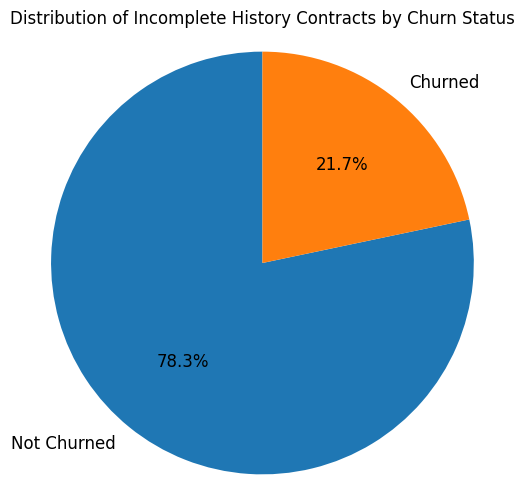

In [56]:
target_df_incomplete_hist = target[target['contract_id'].isin(contracts_less_than_12_entries.index)]

churn_counts = target_df_incomplete_hist['has_churned_over_next_3m'].value_counts()
custom_labels = ['Not Churned', 'Churned']
textprops = {"fontsize":12}

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=custom_labels, autopct='%1.1f%%', startangle=90, textprops =textprops)
plt.title('Distribution of Incomplete History Contracts by Churn Status')
plt.axis('equal')  
plt.show()

In [57]:
target_df_incomplete_hist['has_churned_over_next_3m'].value_counts()

has_churned_over_next_3m
0    83
1    23
Name: count, dtype: int64

In [58]:
print(f"Percentage of contracts with incomplete history for churned customers: {round(23/target['has_churned_over_next_3m'].value_counts()[1] * 100,2)}%")
print(f"Percentage of contracts with incomplete history for not churned customers: {round(83/target['has_churned_over_next_3m'].value_counts()[0] * 100,2)}%")

Percentage of contracts with incomplete history for churned customers: 1.44%
Percentage of contracts with incomplete history for not churned customers: 0.57%


The amount of contracts with incomplete history can be considered low, however if we decide to drop these contracts, we have to limit our model to only make predictions on data with a complete 12 month history. This means that we cannot use our predictive model on new clients (with less than 12 month history). Whilee this can still be a viable option, we will make this decision later.

In [59]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   contract_id              193002 non-null  object 
 1   reference_date           193002 non-null  object 
 2   price_energy_1st_period  191643 non-null  float64
 3   price_energy_2nd_period  191643 non-null  float64
 4   price_energy_3rd_period  191643 non-null  float64
 5   price_power_1st_period   191643 non-null  float64
 6   price_power_2nd_period   191643 non-null  float64
 7   price_power_3rd_period   191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


We can see that there are also entries with null values. Let's take a look into that:

<Axes: >

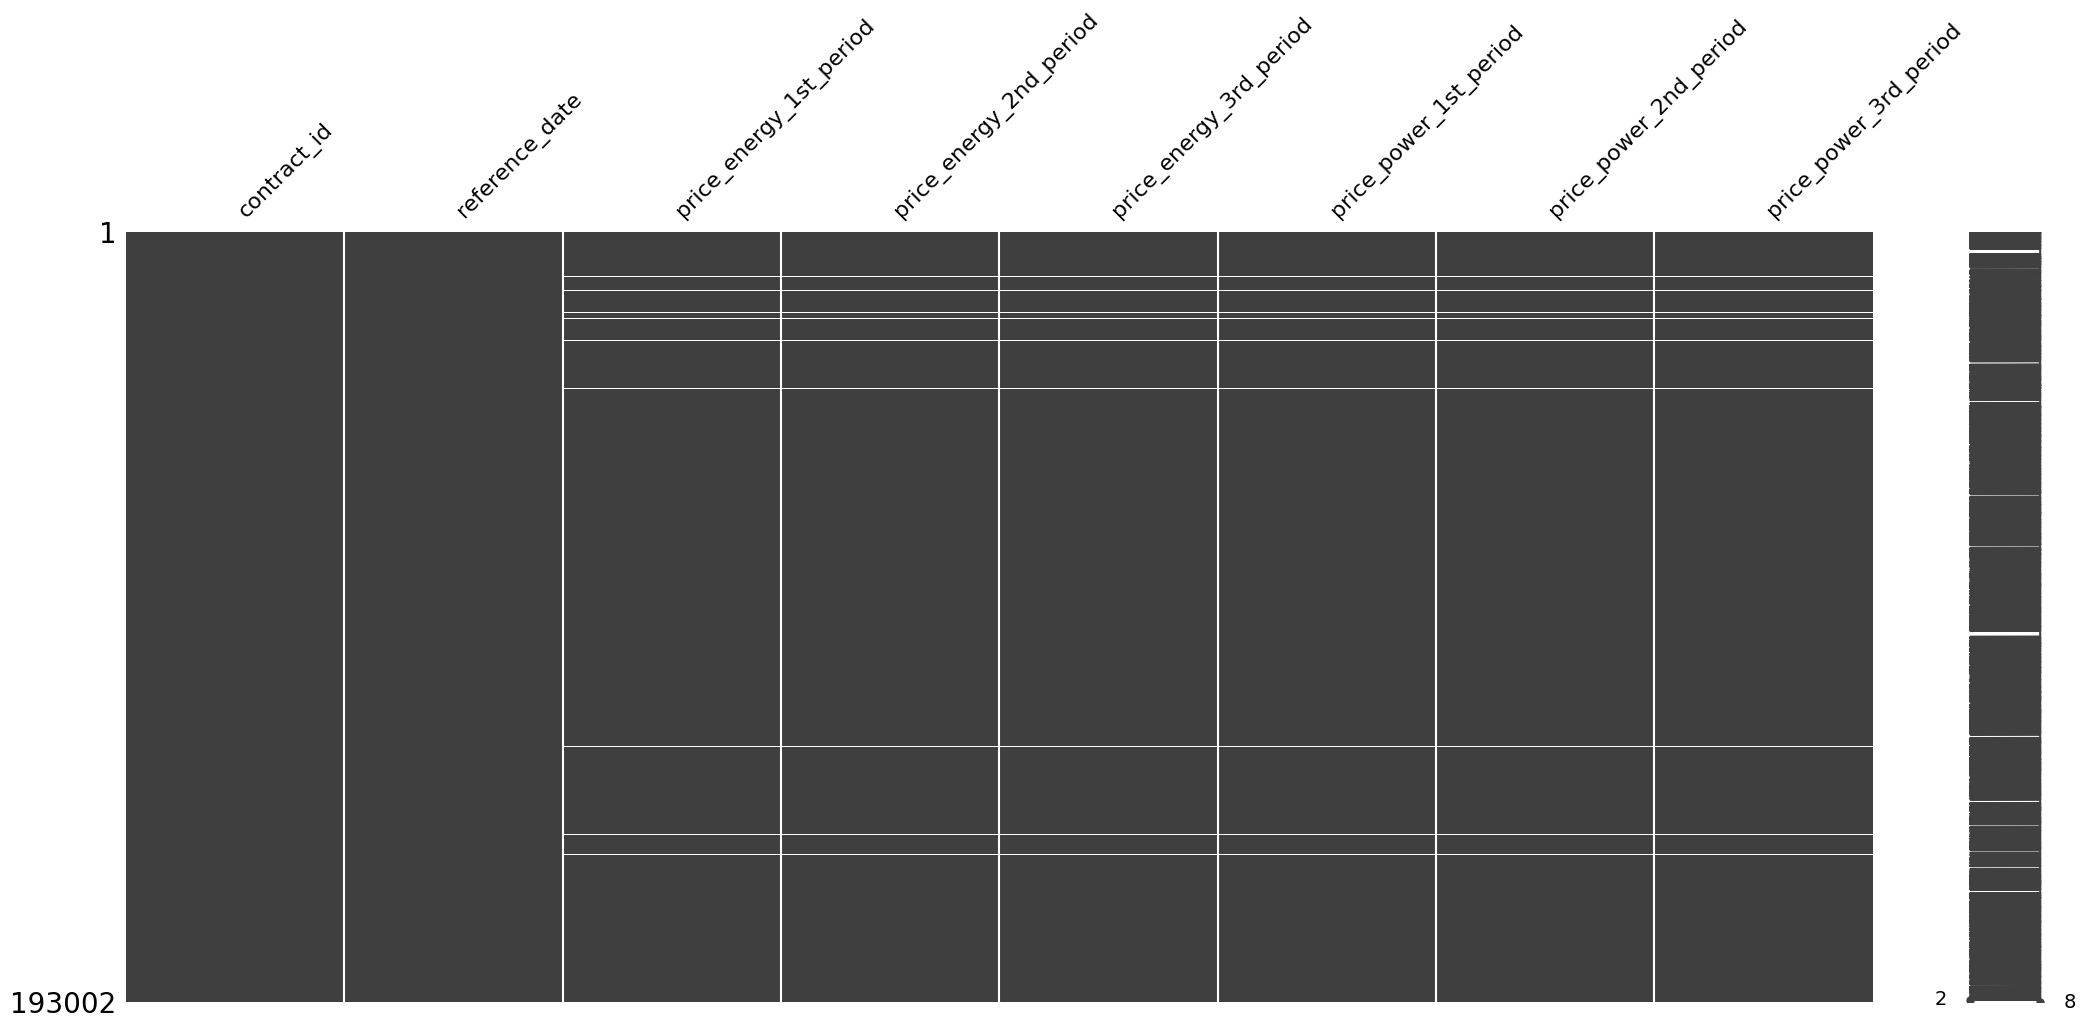

In [60]:
msno.matrix(hist)

<Axes: >

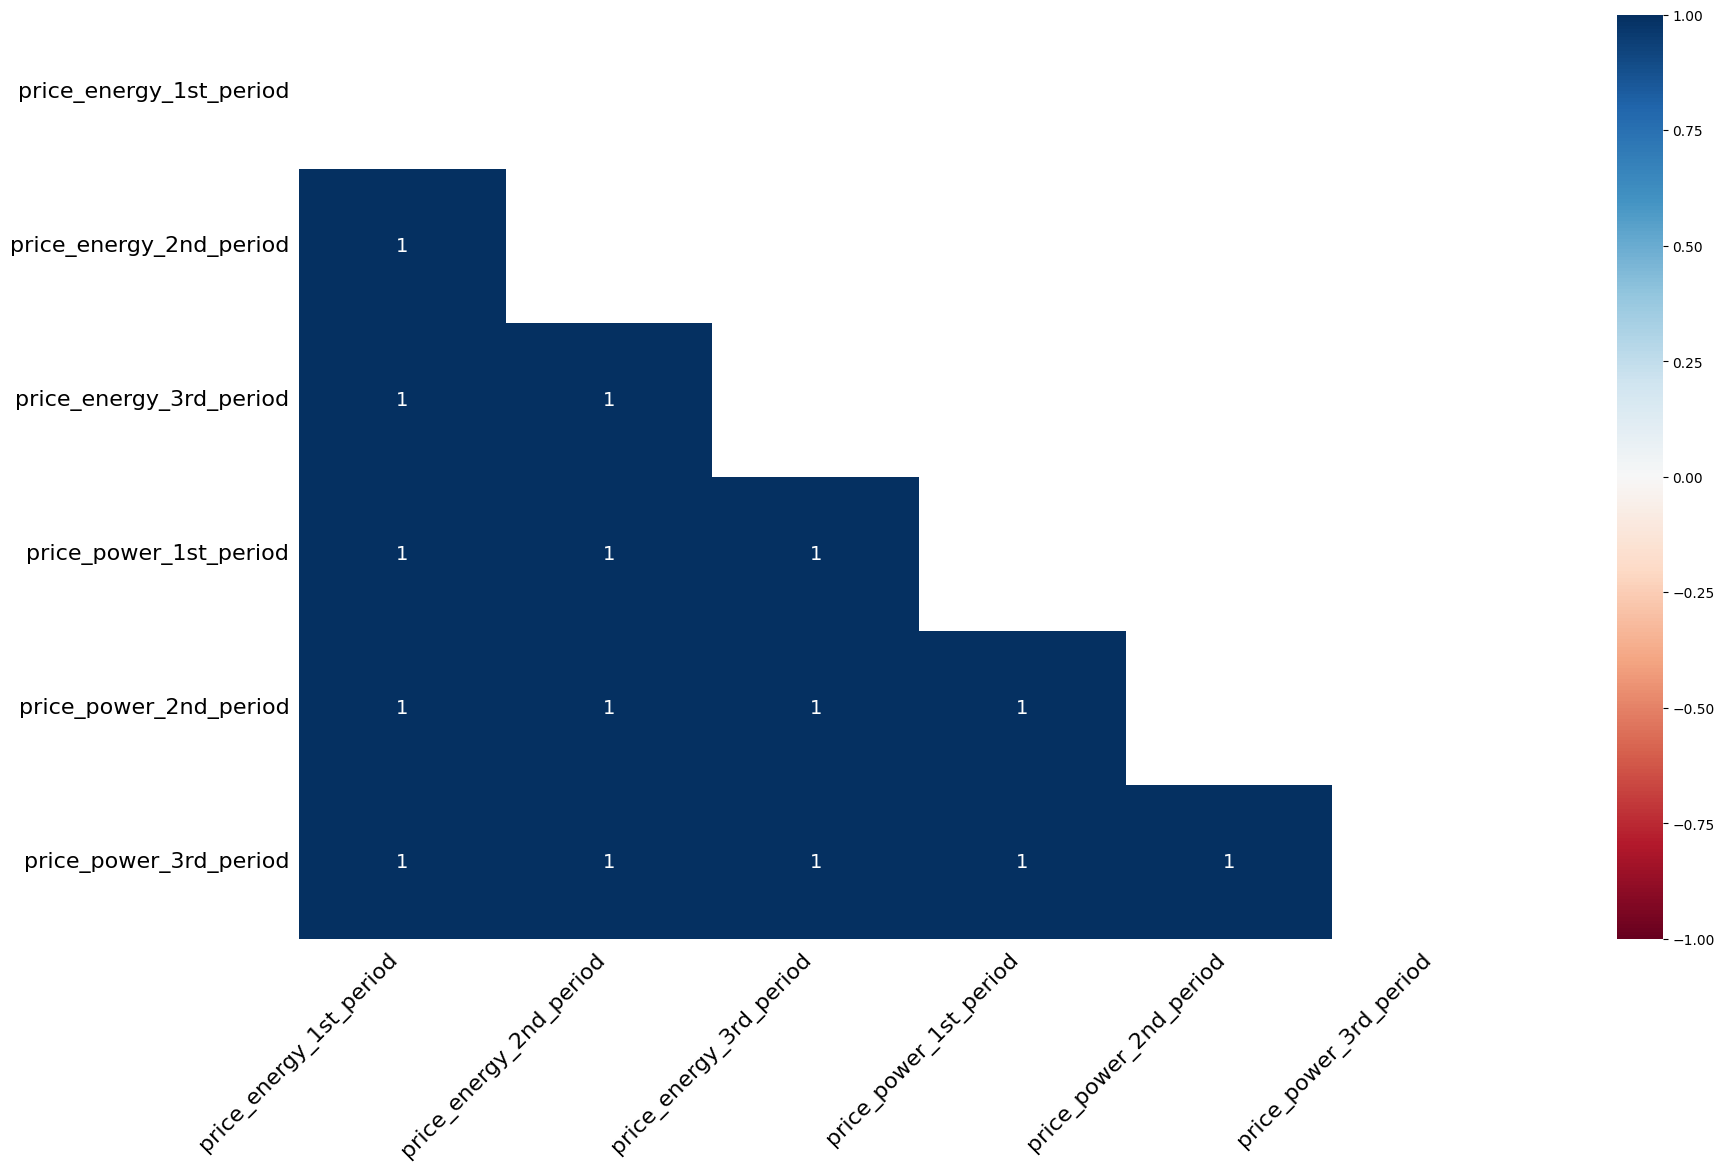

In [61]:
msno.heatmap(hist)

In [62]:
print(f'Percetange of entries with null data: {round((193002-191643)/193002*100,2)}%')

Percetange of entries with null data: 0.7%


Looking at the historical data, 99.3% of the data is complete for all features. For the rest, if a value is missing in one of the numeric columns, it is missing in all the rest of the numerical ones. We can conclude that for 0.7% of the contracts, the historical data is incomplete. We can look into this even further to see if we can find out why the data is missing.

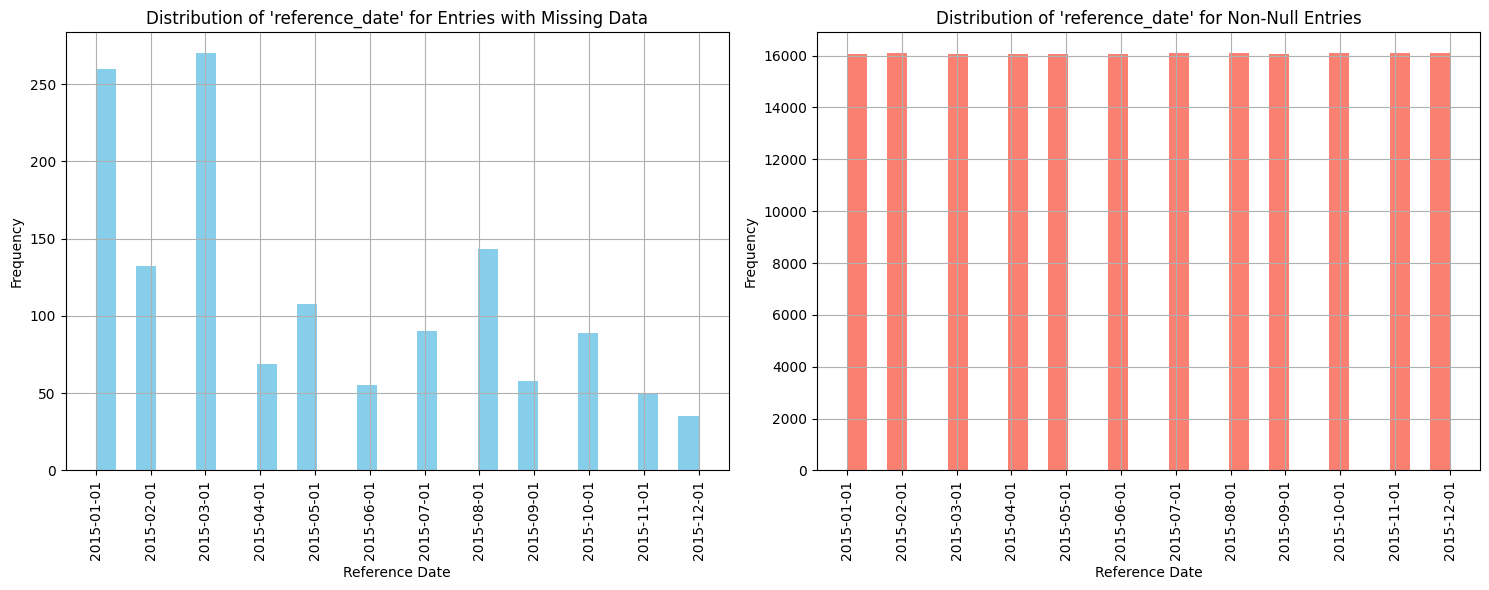

In [63]:
unique_reference_dates = sorted(hist['reference_date'].dropna().unique())

missing_data = hist[hist.isnull().any(axis=1)]
non_missing_data = hist.dropna(subset=['reference_date'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.hist(missing_data['reference_date'], bins=30, color='skyblue')
ax1.set_title("Distribution of 'reference_date' for Entries with Missing Data")
ax1.set_xlabel("Reference Date")
ax1.set_ylabel("Frequency")
ax1.grid(True)

ax2.hist(non_missing_data['reference_date'], bins=30, color='salmon')
ax2.set_title("Distribution of 'reference_date' for Non-Null Entries")
ax2.set_xlabel("Reference Date")
ax2.set_ylabel("Frequency")
ax2.grid(True)

for ax in (ax1, ax2):
    ax.set_xticks(range(len(unique_reference_dates)))
    ax.set_xticklabels(unique_reference_dates, rotation=90)

plt.tight_layout()
plt.show()


Most of the empty entries come from the begining of the year. 

In [64]:
contracts_with_null = hist['contract_id'][hist.isnull().any(axis=1)].value_counts()
contracts_with_null.shape[0]

1207

In [65]:
contracts_with_null.value_counts()

count
1     1099
2       84
3       20
12       2
4        2
Name: count, dtype: int64

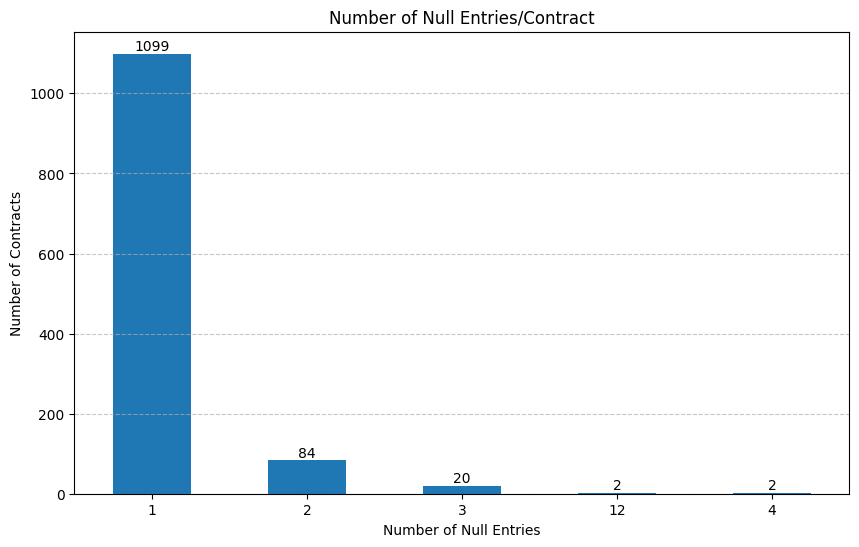

In [66]:
data = contracts_with_null.value_counts()

plt.figure(figsize=(10, 6))
data.plot(kind='bar')
plt.title('Number of Null Entries/Contract')
plt.xlabel('Number of Null Entries')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(data.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

We find there are 1207 contracts with null entries. Particularly, there are even contracts with 12 entries of only null data.

In [67]:
hist[hist['contract_id']== '8d7da64122bba29af851e7252ae36484']

contract_id reference_date  \
21083   8d7da64122bba29af851e7252ae36484     2015-09-01   
49075   8d7da64122bba29af851e7252ae36484     2015-04-01   
54614   8d7da64122bba29af851e7252ae36484     2015-05-01   
64566   8d7da64122bba29af851e7252ae36484     2015-06-01   
65442   8d7da64122bba29af851e7252ae36484     2015-03-01   
80503   8d7da64122bba29af851e7252ae36484     2015-10-01   
82571   8d7da64122bba29af851e7252ae36484     2015-11-01   
94468   8d7da64122bba29af851e7252ae36484     2015-08-01   
123046  8d7da64122bba29af851e7252ae36484     2015-02-01   
147609  8d7da64122bba29af851e7252ae36484     2015-12-01   
160034  8d7da64122bba29af851e7252ae36484     2015-07-01   
166853  8d7da64122bba29af851e7252ae36484     2015-01-01   

        price_energy_1st_period  price_energy_2nd_period  \
21083                       NaN                      NaN   
49075                       NaN                      NaN   
54614                       NaN                      NaN   
64566                       NaN                      NaN   
65442                       NaN                      NaN   
80503                       NaN                      NaN   
82571                       NaN                      NaN   
94468                       NaN                      NaN   
123046                      NaN                      NaN   
147609                      NaN                      NaN   
160034                      NaN                      NaN   
166853                      NaN                      NaN   

        price_energy_3rd_period  price_power_1st_period  \
21083                       NaN                     NaN   
49075                       NaN                     NaN   
54614                       NaN                     NaN   
64566                       NaN                     NaN   
65442                       NaN                     NaN   
80503                       NaN                     NaN   
82571                       NaN                     NaN   
94468                       NaN                     NaN   
123046                      NaN                     NaN   
147609                      NaN                     NaN   
160034                      NaN                     NaN   
166853                      NaN                     NaN   

        price_power_2nd_period  price_power_3rd_period  
21083                      NaN                     NaN  
49075                      NaN                     NaN  
54614                      NaN                     NaN  
64566                      NaN                     NaN  
65442                      NaN                     NaN  
80503                      NaN                     NaN  
82571                      NaN                     NaN  
94468                      NaN                     NaN  
123046                     NaN                     NaN  
147609                     NaN                     NaN  
160034                     NaN                     NaN  
166853                     NaN                     NaN

Let's compare the reference date of the null data to the contract start date and see if this data is missing due to 

In [68]:
no_hist_contracts_df = missing_data[['contract_id','reference_date']].copy()
no_hist_contracts_df.shape[0]

1359

In [69]:
merged_df = pd.merge(no_hist_contracts_df, df, on='contract_id', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   contract_id                          1359 non-null   object 
 1   reference_date                       1359 non-null   object 
 2   company_category                     524 non-null    object 
 3   channel                              1024 non-null   object 
 4   elect_cons_at_12m                    1359 non-null   int64  
 5   gas_cons_at_12m                      1359 non-null   int64  
 6   elect_cons_last_month                1359 non-null   int64  
 7   contract_activation_date             1359 non-null   object 
 8   contract_end_date                    1359 non-null   object 
 9   contract_fist_act_date               327 non-null    object 
 10  contract_last_mod_date               1333 non-null   object 
 11  contract_renewal_date         

<Axes: >

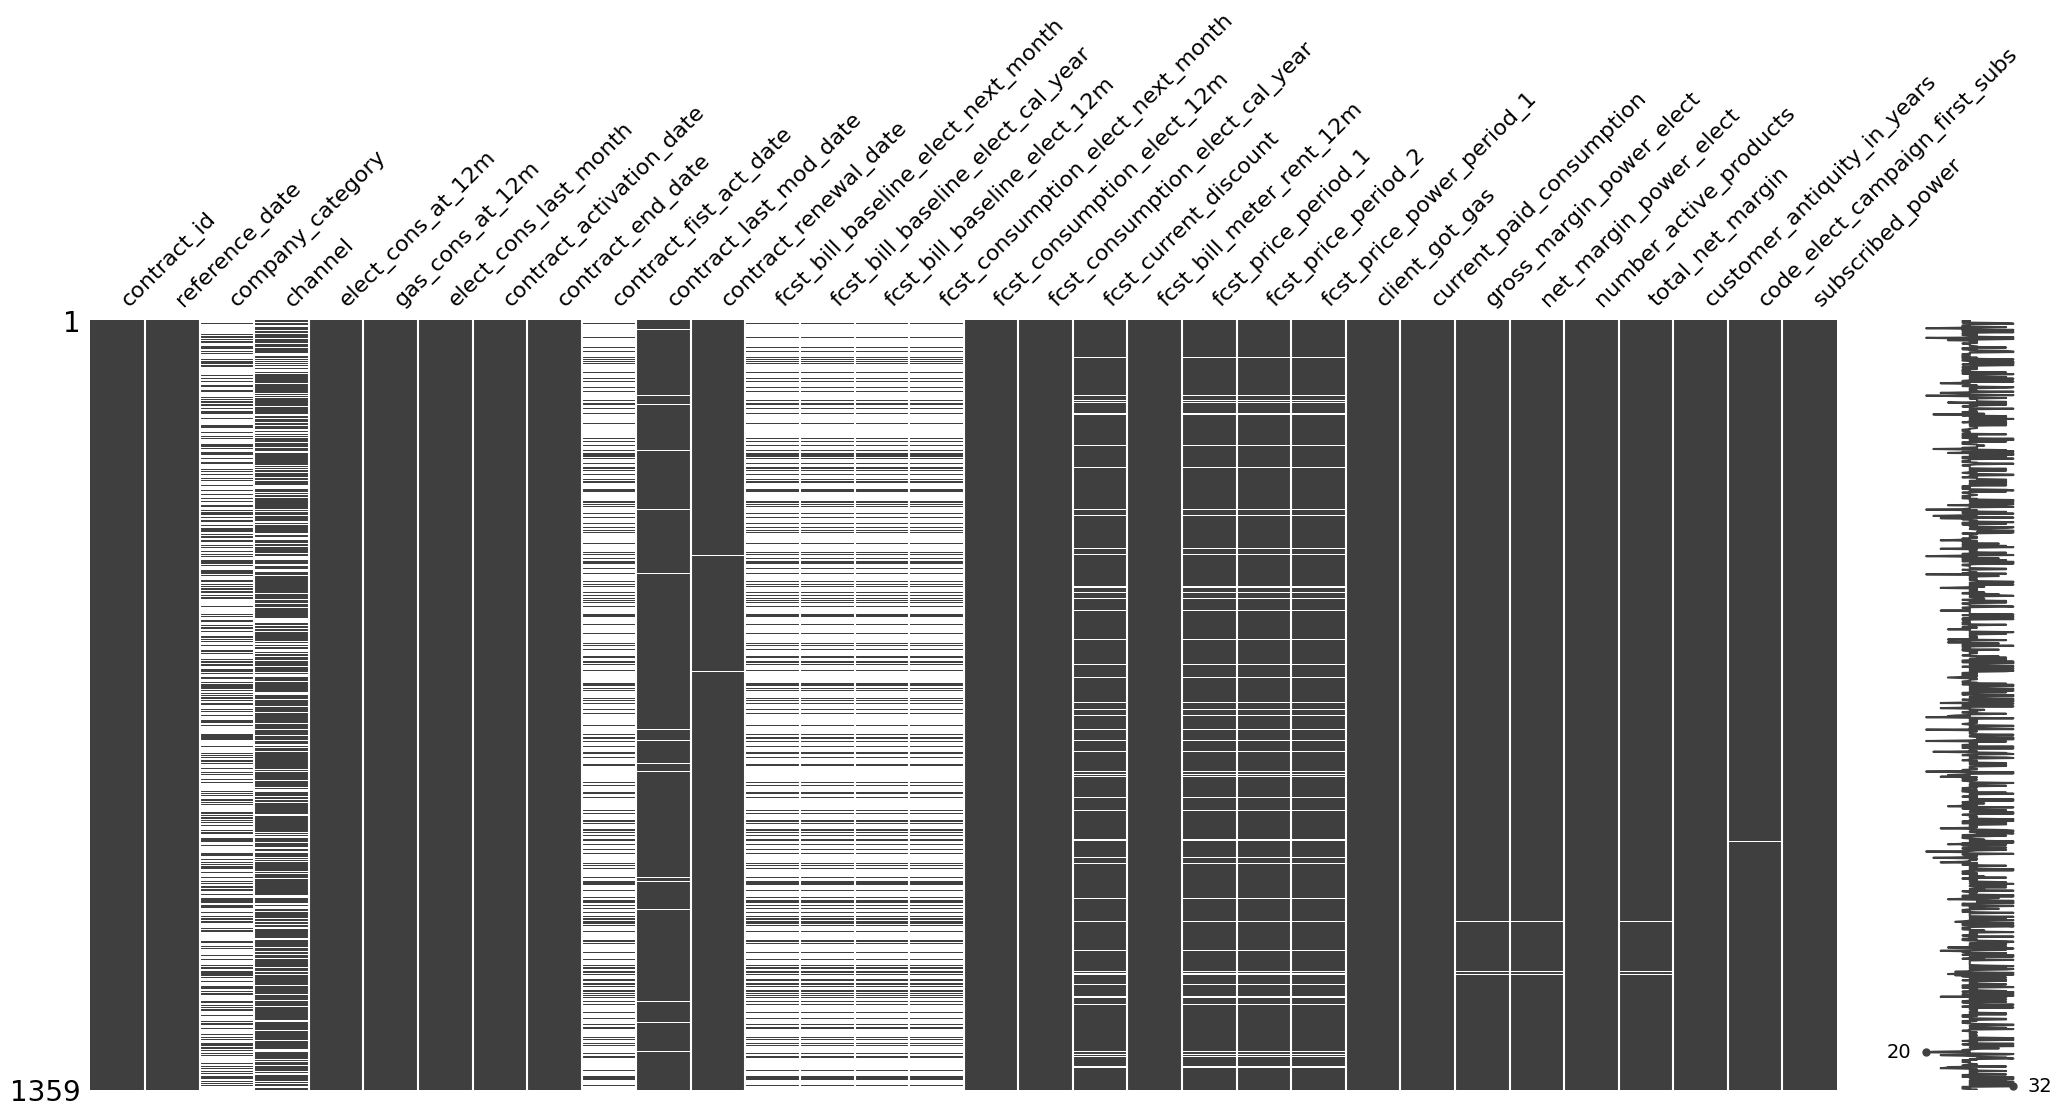

In [70]:
msno.matrix(merged_df)

<Axes: >

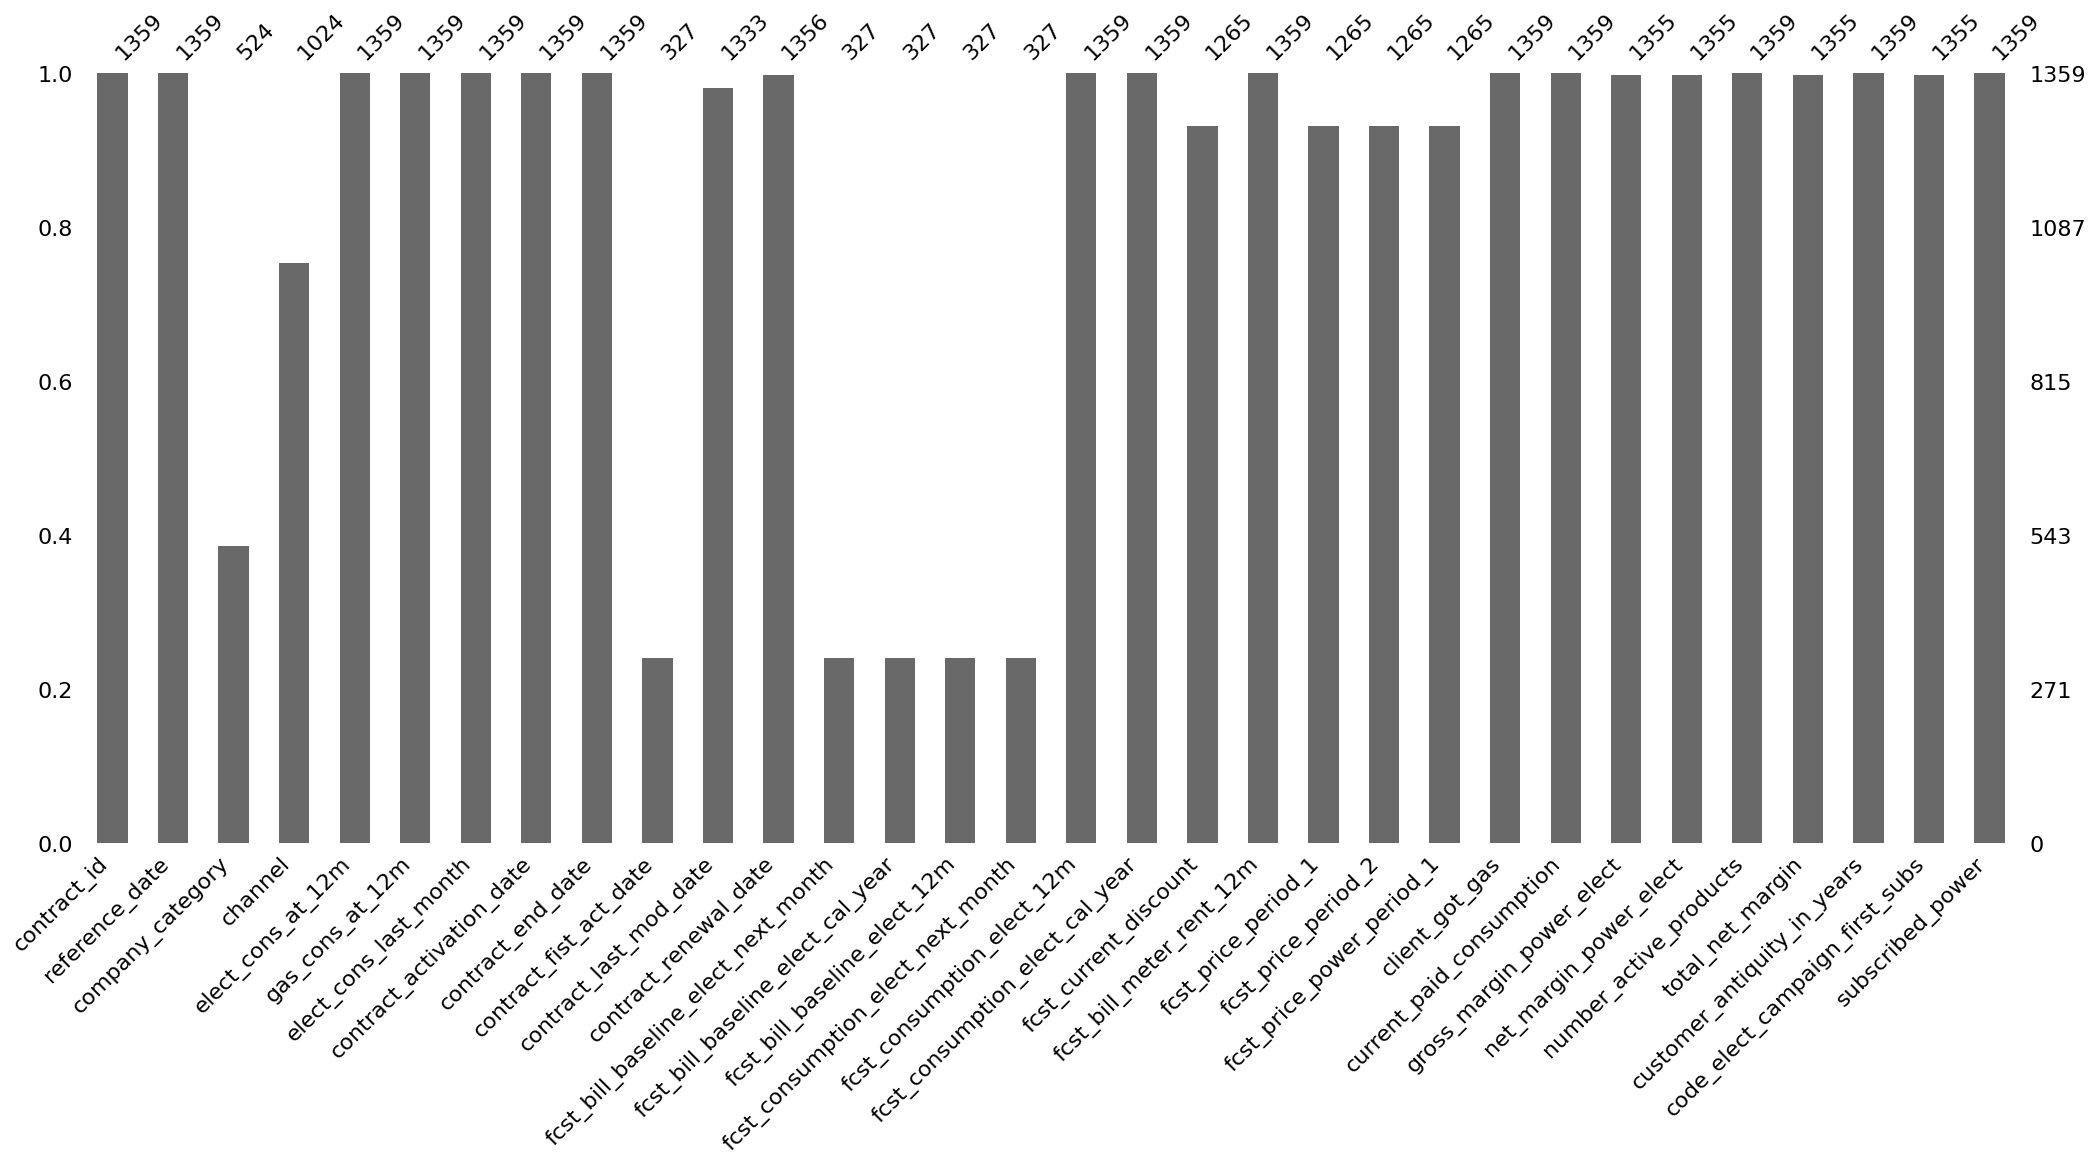

In [71]:
msno.bar(merged_df)

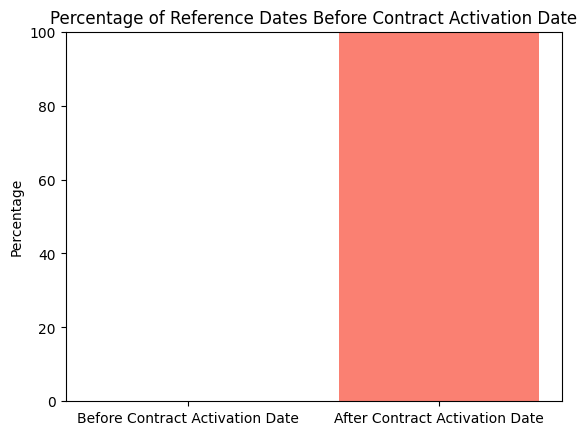

In [72]:
merged_df['reference_date'] = pd.to_datetime(merged_df['reference_date'])
merged_df['contract_activation_date'] = pd.to_datetime(merged_df['contract_activation_date'])

merged_df['is_before'] = merged_df['reference_date'] < merged_df['contract_activation_date']

percentage_before = (merged_df['is_before'].sum() / len(merged_df)) * 100

plt.bar(['Before Contract Activation Date', 'After Contract Activation Date'], [percentage_before, 100 - percentage_before], color=['skyblue', 'salmon'])
plt.title('Percentage of Reference Dates Before Contract Activation Date')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

We conclude that the clients with null historical data are not new clients, and all their contracts started before the referenced date.

### General Observations:
* There is historical data for all the contracts from the target data
* The hisotrical ddata confonts with 3 issues:
    * 0 values
    * NaN values
    * not enough entries for some of the contracts to cover 12 months of history
* Even if the above issues do not affect the majority of data, their presence can be considered organic